## Project Name: ***Capstone Project***
## Subject: ***MA5851***
## Author: ***Sundeep Vemulapally***

## A brief intro into the project, project deliverables and methods followed.
>
**Data Harvesting using the web crawler**
>- The crawler is built using the Selenium and Chrome webdriver.
>- The first part is to build and use the crawler to harvest the data from the website.
>- The harvested data is stored into ***CSV file*** to be further used in the data analysis.
>

<br>

**Data loading and Wrangling Procedures.**
>- The data is loaded into the environment, checked for any missing values.
>- The data is cleaned, removed for any URLs or unwanted noise in the data like determiners.
>- Rather than ***Named Entity Recognition (NER)*** words relating to ***Nouns, proper Nouns, Verbs and Adjectives*** are retained
>- The data is visualised with the ***NLTK Frequency*** methods and top occurring words with distribution plots.
>- The top occurring words are checked with ***WordClouds*** and the distribution.
>- The word's distribution is checked with ***histograms*** and ***descriptive statistics*** is shown for the distribution.

<br>

**Application of Machine Learning(ML) algorithms and Natural Laguane Processing NLP tasks**
>  **Topic Modelling**
>- The topics in the reviews are key to understanding the customer thoughts on the restaurants.
>- The ***topic modelling*** is done with:
>>- The initial model is done with stochastic model ***Latent Dirichlet Allocation (LDA)***
>>>- Optimal model is retained through Cross-Validation of topics through the iterative approach.
>>>- The  **Number of topics** is chosen on the optimal model which is used to build the current model.
>>>- The optimal model built is visualised with ***Python LDA Visualisation (pyLDAvis)*** and topics through ***WordCloud***.
>>- The second model is the dimensionality reduction method **Non-negative Matrix Factorisation(NMF)**.
>>>- The optimal model and number of topics is selected through iterative cross-validation approach.
>>>- The optimal topic number is used to build the model and topics are visualised through ***WordCloud***.
>>>- The model efficiency is checked through ***Perplexity and Coherence Score***.
>>-  A review is taken from the real world data and is used to check the model prediction and topic number recognition in the model.

<br>

> **Sentiment Analysis and Classification Models**

>- Another key aspect is to understand the sentiment of the customer and their views
>- A **Neural Network** based  **sentiment analyser (from Flair-package)** is used to understand the **polarity scores**.
>>- The Analyser is trained to differentiate th sentiments into ***Positive and Negative** classes.
>- The Classification algorithm based on the **Ensemble methods like XGBOOST and Random Forest** methods are used.
>>- A **Grid-search** method is used to pick the best model and the best model is applied in prediction.
>>- The classification reports are done for both **Train and Test** data to understand the evaluation metrics.
>>- In the classification model **XGBoost**  has a better performance than **Random Forest**.
>>- A Negative and Positive review is used to assess the prediction and the topics they point to.

### Setting the Environment for the crawler

In [144]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import csv
import random

In [145]:
import selenium
selenium.__version__

'4.8.3'

### Crawler to the harvest the URLs from the website

> The URLS are harvested using Selenium webdriver.
> The URLs harvested  as below:
>- Select category **Indian** by clicking the Autocomplete text box and selecting from the dynamic updated options.
>- A `time.sleep()` and `WebDriverWait` is used to make the **AJAX updation** to mimic the human interaction.
>- Select ***Location (Place, State)*** by clicking the Autocomplete text box  and selecting from the dynamic updated options.
>>- The location was not deliberately given as argument, the same code can be modified to give the location and category as parameters.
>- click on the search button to get the top ten restaurants in the area.
>-  All the necessary elements from their ***classes or BY XPATH*** are extracted and stored into `CSV`.

In [132]:
def find_restaurant_URLs():
    #Setting Chrome Driver Options
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito') # Incognito mode, history will not be saved.
    options.add_argument('--headless') # Runs without the UI and display server dependencies.
    options.add_argument('-no-sandbox') #Processes that are sandboxed will be disabled and required for headless mode.
    options.add_argument('-disable-dev-shm-usage')
    options.add_argument("--disable-geolocation") #Ignores the geo-popup which the site has enabled
    driver = webdriver.Chrome(executable_path='path-chrome-driver',
                              chrome_options=options)

    #Getting the URL for the website
    # Give restaurant URL
    driver.get("restauranturl")
    print("Getting URL")
    time.sleep(2)

    #Searching for the food type dropdown and selecting the location to get the list of restaurants
    food_type = driver.find_element(By.ID, "categories")
    food_type.clear()
    food_type.send_keys("Indian")
    time.sleep(3)
    #Select from the auto-complete text the categories and location
    selection = driver.find_element(By.CLASS_NAME,"categories-item")
    selection.click() # Selects the "Indian" in autopopulated dropdown
    print("Selected food")
    time.sleep(2)

    location = driver.find_element(By.XPATH,'//*[@id="autocomplete"]')
    location.clear()
    location.send_keys("Dublin CA")

    time.sleep(5)

    location.send_keys(Keys.ARROW_DOWN) # dynamically selects the down arrow.
    location.send_keys(Keys.RETURN) # Selects the pop-up location in the drop down menu
    print("Selected Location")

    time.sleep(4)

    # Click on the Search button
    driver.find_element(By.XPATH,'//*[@id="form"]/div[1]/div[3]/input').click()
    print("Button Clicked")
    time.sleep(16)

    #Getting URLs of the restaurants and appending them to a list
    rest_urls = driver.find_elements(By.CLASS_NAME,"biz_title")
    ls_resturls = []
    for url in rest_urls:
        ls_resturls.append(url.get_attribute("href"))

    # Append the list of URLs to a dataframe
    resturls_df = pd.DataFrame(ls_resturls)
    print("Done writing to the csv.....Number of restaurants are:" + str(len(resturls_df)))
    resturls_df.to_csv("Restaurant_URLs.csv", encoding="utf-8")

    #Quit the chrome driver
    driver.quit()


> **Invoking the function to retrieve the URLs from the website.**

In [133]:
# Calling the function to retain the URLs as CSV for the top ten restaurants in the locality
find_restaurant_URLs()

Getting URL
Selected food
Selected Location
Button Clicked
Done writing to the csv.....Number of restaurants are:10


### Crawler to the harvest the **reviews, ratings, restaurant-names** from the website

> The data is harvested using Selenium webdriver.
> The Data is harvested as below:
>- The URLs are looped from the above CSV file to retrieve the respective restaurant's data.
>- A `time.sleep()` and `WebDriverWait` is used to make the **AJAX updation** to mimic the human interaction.
>- Search for ***more reviews*** and click the button.
>>- A while loop is used until the more buttons are exhausted.
>- Search for the ***comment-text*** element and ***fill*** element.
>>- A `try except` is used to assert the elements exist in the page.
>- The data is appended to list of dictionaries and the return variable is a list of dictionaries.
>- The data is retained as `pd.DataFrame` is appended to the `CSV` file for each restaurant.


In [146]:
def getrestaurantreview(restreview_url):
    """
    The function takes the restaurant URL as arguments and returns all the
    reviews, rating and restaurant names as list of dictionaries.
    :param restreview_url:
    :return: ls_rest-reviews (list of dictionaries)
    """

    #Setting Chrome Driver Options
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    options.add_argument('--headless')
    options.add_argument('-no-sandbox')
    options.add_argument('-disable-dev-shm-usage')
    options.add_argument("--disable-geolocation")
    driver = webdriver.Chrome(executable_path='C:\path\chromedriver',
                              chrome_options=options)

    ls_rest_reviews = []
    ls_rest_dict = {}

    ##Getting the URL for the website to retrieve the comments
    time.sleep(2)
    #Getting the restaurant name
    restname = restreview_url.split("/")[5] .replace("-"," ")

    print("Getting reviews for "+restname)
    driver.get(restreview_url)
    print ("Went to the url")
    t_wt = random.randint(6,12)
    time.sleep(t_wt)
    wait = WebDriverWait(driver, 10)

    #Clicking More Reviews button
    driver.find_element(By.PARTIAL_LINK_TEXT,"More Reviews").click()
    print("Load more reviews clicked")
    time.sleep(7)

    # Click the Load More Reviews button if it exists
    while(True):
        try:
            # print ("Try for the more reviews button")
            button = wait.until(EC.element_to_be_clickable((By.ID, 'getMoreComments')))
            if(button):
                # print ("Review Button found in iteration")
                driver.execute_script("arguments[0].scrollIntoView();", button)
                t_wait = random.randint(4,15)
                time.sleep(t_wait)
                driver.execute_script("arguments[0].click();", button)
                print ("Load Reviews button clicked")
                time.sleep(4)
            else:
                print ("No more reviews button found")
                break
        except Exception as e:
            # Exit the loop if the button doesn't exist
            print ("No button exists as there are no reviews to load.")
            break

    try:
        ## Getting the reviews
        rest_all_reviews = driver.find_elements(By.CLASS_NAME,"comment-inner")
        print("Number of reviews:"+str(len(rest_all_reviews)))
        for rest_review in rest_all_reviews:
            #Getting the individual review
            review = rest_review.find_element(By.CLASS_NAME,"comment-text")

            #Getting the review's rating. If the element is not found, set rating = 0
            try:
                rest_rating = rest_review.find_element(By.CLASS_NAME,"fill")
                rating = rest_rating.get_attribute('style').split(":")[1].split("%;")[0]
            except:
                print("Rating element is not found.Setting the rating to 0.")
                rating = str(0)
                pass

            #Storing the reviews into a dictionary
            ls_rest_dict= {'restaurant_name': restname, 'restaurant_review':review.text,'rating':rating}
            ls_rest_reviews.append(ls_rest_dict)
    except Exception as exp:
        print(exp)
        pass

    t_wait1 = random.randint(3,16)
    time.sleep(t_wait1)
    # Quitting the chrome driver
    driver.quit()
    print("...Driver Quitted...")

    return ls_rest_reviews



### Invoking the function to retrieve the reviews, ratings from the restaurant data.


> ***An important note: Before submission of the project, the code is checked again on single restaurant to make sure its working***
>- The comment number you see 81 are not the true ones and belong to one of the retained restaurant, they are part of the final test.
>- There are two parts to the below code and some considerations:
>>- The first is a full list of the CSV restaurants which can be used to run the entire restaurant list.
>>- The second is the ***test list*** which is used in the final check process to see if the code is still working as per the specifications.
>>- The Crawler is run in multiple phases and also during off-peak hours, so as not to stress the site. The program is not run in continuous phase, ran on multiple days and times not get noticed and blocked by website.

In [147]:
#Read the restaurant URLs from the stored file and convert to a list

### If running and testing the entire code un-block the below code
#****************************************************************************************
# resturls = pd.read_csv("Restaurant_URLs.csv",names=["reviews_url"],  skiprows=1)
# ls_resturls = list(resturls.reviews_url)

#*****************************************************************************************

# For testing or checking the performance of the code use the below list
# ******** if want to run the entire CSV list please unblock above code*******************
#******************************************************************************************
ls_resturls = ["Give-restaurant_url.com"]


for rest_url in ls_resturls:
    print ("Getting Reviews of "+rest_url)
    ls_restreviews = []

    #Call the method to get the reviews of the given restaurant and append to a list
    ls_review = getrestaurantreview(rest_url)
    ls_restreviews.append(ls_review)
    time.sleep(9)

    #Create a dataframe from the reviews list
    reviews_df = pd.DataFrame(ls_restreviews[0], columns=['restaurant_name', 'restaurant_review','rating'])

    #Append the reviews to a CSV file
    reviews_df.to_csv("RestaurantRatings_Reviews_test.csv",mode='a',encoding="utf-8",header=False)

    print("Done writing to the csv.....Number of reviews appended are:" + str(len(reviews_df)))

    t_wait1 = random.randint(5,9)
    time.sleep(t_wait1)

Getting ReviewsGetting reviews for biryani junction temptations 
Went to the url
Load more reviews clicked
Load Reviews button clicked
Load Reviews button clicked
Load Reviews button clicked
Load Reviews button clicked
Load Reviews button clicked
Load Reviews button clicked
Load Reviews button clicked
No button exists as there are no reviews to load.
Number of reviews:81
...Driver Quitted...
Done writing to the csv.....Number of reviews appended are:81


******************************
********************************

## Data Wrangling, Natural Language Processing(NLP) and Machine Learning(ML) Models building.

### Preparing the environment.
 <br>

### Loading of the required package

In [2]:
import pandas as pd
import numpy as np
import nltk
import requests
import pickle
import time
import re                                               # Regular expresion package
import nltk                                             # Natural Language tool-kit
nltk.download('stopwords')                              # Stop words english
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer              # For Stemming of the words.
from nltk.stem import WordNetLemmatizer                 # lemmatize the words which are in the dictionary.
from nltk.tokenize import RegexpTokenizer               # Regular expression tokenizer.
from scipy.stats import randint                         # Random integer generator
from sklearn.preprocessing import MultiLabelBinarizer   # For assessing the multilevel classes.
from sklearn.model_selection import train_test_split    # For splitting the data into train a test.
from sklearn.metrics.pairwise import cosine_similarity  # For pair wise vector similarity calculation.
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer # TFIDF vectorizer.
from sklearn.pipeline import Pipeline, make_pipeline    # Pipeline for model building.
from sklearn.preprocessing import OneHotEncoder         # for one hot encoding of the categorical variables.
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight                  # For Balancing the imbalanced data set.
from sklearn.metrics import ConfusionMatrixDisplay      # For Displaying Confusion matrix
# Important metrics.
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,precision_recall_curve, auc, roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier.
from sklearn.model_selection import GridSearchCV        # Grid Search for cross validation.
from sklearn.preprocessing import LabelEncoder          # For label encoding the response variable.
from sklearn.model_selection import StratifiedKFold     # stratified K-fold
from sklearn.model_selection import cross_val_score     # Cross_validation score to check the model accuracy.
import xgboost as xgb                                   # Importing XGBoost classifier.
from xgboost import XGBClassifier                       # Importing XGB-Classifier.
from wordcloud import WordCloud, STOPWORDS
#########################################################################################
import spacy                                            # Importing spacy package
from spacy.lang.en.stop_words import STOP_WORDS         # Importing the stop words used in text pre-processing.
import gensim                                           # Importing gensim package for topic modelling
import gensim.corpora as corpora                        # Importing gensim corpora
from gensim.utils import simple_preprocess              # Importing gensim utilities for pre-processing cleaning
from gensim.models.phrases import Phraser               # Importing phraser to build bi-gram and tri-gram models.
from gensim.models.phrases import Phrases
from gensim.corpora.dictionary import Dictionary        # Importing the dictionary
from gensim.models import CoherenceModel                # For calculating the Coherence score
import pyLDAvis                                         # For Python LDA Visualisation.
import pyLDAvis.gensim                                  # For LDA and NMF visualisation
import pytorch_revgrad
from flair.data import Sentence                         # For classifying the text sentence
from flair.nn import Classifier                         # Training the classifier and prediction of Sentiment using RNN
#################################################################################
import warnings                                         # Disabling warnings.
warnings.filterwarnings('ignore')

import seaborn as sns
from tqdm import tqdm                                   # Total Quality Data Management.
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


###  Data loading, Wrangling, pre-processing and visual explorations of the data

The processes followed are:
>- Load the data into the environment
>- check for any missing values in the data.
>- Visually explore the data to understand the review's distribution in the data.
>- Cleaning the data for any word removal or unwanted words which can induce noise into the data
>- Lemmatizing or using the POS tagging to retain the important words.

<br>



#### Loading the data into the environment. <a class="anchor" id="Loading_the_data_into_the_environment."><a>

In [9]:
# The data scraped from the restaurants reviews are loaded into the environment.
restaurant_review_df = pd.read_csv('RestaurantRatings_Reviews.csv', keep_default_na = False, encoding = 'utf_8',
                                   names= ["restaurant_name", "reviews", "rating"],
                                   dtype = {"restaurant_name": "object",
                                            "reviews": "object",
                                            "rating": "int64"})
# replacing the NAN's with empty string, which is used for future purposes.
restaurant_review_df = restaurant_review_df.replace(to_replace=np.nan, value = "")
# Resetting the index
restaurant_review_df = restaurant_review_df.reset_index()
restaurant_review_df = restaurant_review_df.drop('index', axis = 1)

restaurant_review_df.head(5)

,restaurant_name,reviews,rating
0,biryani junction temptations,Look how stunning the cake looks! It was made ...,100
1,biryani junction temptations,Fresh and delicious pastries. Plenty of option...,100
2,biryani junction temptations,They have a good variety of food and bakery op...,100
3,biryani junction temptations,Their food and service is great. We love the g...,100
4,biryani junction temptations,This place has the best butter chicken that I ...,100


#### Checking for the empty strings in the data.

In [10]:
# Checking for any missing reviews in the data.
print('The empty reviews in the data are: \n\n', restaurant_review_df['reviews'].isnull().sum()) # Checking for any null values in the data.
print('\n The NAN values in the data are:  \n', restaurant_review_df['reviews'].isna().sum()) # Checking for any "NAN" values in the data.

The empty reviews in the data are: 

 0

 The NAN values in the data are:  
 0


In [11]:
restaurant_review_df[restaurant_review_df.reviews.str.strip().str.len()<=10]

,restaurant_name,reviews,rating


In [12]:
#### Checking the restaurant reviews where the values is equal to zero and
null_rating = restaurant_review_df[restaurant_review_df.rating == 0]
print("{x}".format(x = "*"*50))
print("The shape of the restaurant review data:", restaurant_review_df.shape)
print("{x}".format(x = "*"*50))
print("The number of reviews with no ratings:", null_rating.shape)
# Dropping the ratings with zero
restaurant_review_df = restaurant_review_df.drop(index=null_rating.index)
# Resetting the index of the data
restaurant_review_df = restaurant_review_df.reset_index()
restaurant_review_df = restaurant_review_df.drop("index", axis = 1)
# The shape of the data after the removal of the null ratings
print("{x} The final shape of the data {y}".format(x = "*"*5, y = "*"*5))
print("Final Shape of the data:", restaurant_review_df.shape)

**************************************************
The shape of the restaurant review data: (2271, 3)
**************************************************
The number of reviews with no ratings: (44, 3)
***** The final shape of the data *****
Final Shape of the data: (2227, 3)


#### Cleaning the data and recognition of the named entities or adjectives (NE)

<br>

The data is cleaned for unwanted symbol or determiners like the words "the" and removed.
This would noise in the data and can have impact on the performance of the model are dropped.

The following steps are adopted:
>- Removal of the "***URLs***"
>- The data retained contained the named entities likes ***Nouns, Personal Nouns and Adjectives***.
>- The data is ***tokenized, lemmatized and affixes*** are removed, compared to dictionary.
>- The data is lemmatized and words related to the ***POS*** tagging like **Nouns, Personal Nouns, Adjectives, Adverbs and Verbs** are retained.
>- Unlike the named entity recognition which retains nouns and adjectives, the current reveiws also focus on the other ares like verbs and adverbs, which are needed for further assessment of the model.
>- The ratings

In [13]:
# If there are "URLs" in the data or some unwanted links in the corpus will be removed.
def remov_url(input_text):
    text_data = re.sub(r'http.?://\S+', "", input_text) # Cleans the u URLs from the text.
    return text_data

#------------------------------------------------------------------------------
# -----------------------------------------------------------------------------
# # Lemmatizing and parts of speech tagging for the words in the reviews

def pos_lemtize(text, pos_tags =["NOUN", "PROPN",  "ADJ", "VERB", "ADV"]):

    """ Takes sentences, add POS tagging
    and lemmatizes and returns the text.
     """
    # print(text)
    pos_tags = ["NNP", "NN", "VBG", "VBN", "VBD", "JJ", "RB"]
    stp_words = STOP_WORDS - set(['no', 'not'])
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner']) # Loading the spacy language for lemmatization.
    pos_text = [] # Initialising the pos_text
    for word in nlp(text): # A for loop to loop over the text "NLP".
        word_text = "" # Empty string
        # IF word is not in stop words or words is part of "Part of  Speech" tags retain
        if word.lemma_ not in stp_words:
            if word.tag_ in pos_tags:    # Checking if the words exist in Parts of speech tagging
                word_text = word.lemma_
                pos_text.append("".join(word_text))
        else:
            pos_text.append("".join(word_text))

    return pos_text

#------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------
def cleaning_text_content(uncleaned_corpus_data, pos_tags = ["NOUN", "ADJ", "VERB", "ADV"]):
    """
    The function takes the uncleaned corpus and cleans all the un-wanted noise and
    information like determiners which are removed through the use of the stopword. The data is
    further tagged with Parts of Speech (POS) tagging to recognise the named entities and Adjectives.

    input: text in reach review or documents
    ouput: cleaned text with URL removed and POS tagged

    """
    cleaned_corpus_data = [] # initialising corpus document
    for i in tqdm(range(0, len(uncleaned_corpus_data))):
        # Substituting word other than normal words such as dates and "#&" with empty string.
        text_dt = uncleaned_corpus_data[i].lower() # Normalising the text
        text_dt = re.sub('[^A-Za-z]', ' ', text_dt ) # retain only words
        # Remove the links or URLs from the data
        text_dt = remov_url(text_dt) # removes the "URLs" from the data or any links.
        text_dt = pos_lemtize(text_dt, pos_tags =["NOUN", "ADJ", "VERB", "ADV"])
        text_dt = re.sub('[^A-Za-z]', " ", str(text_dt ).strip()) # Stripping of any unwanted symbols and material
        text_dt = nltk.word_tokenize(text_dt)  # tokenizing the words.
        text_dt= " ".join(text_dt) # Joining the list.
        cleaned_corpus_data.append(text_dt) # Appending the list to the corpus.
    return cleaned_corpus_data


# -------Tokenizing the cleaned documents into and doing some pre-processing using "gensim utils".----------
#--------------------------------------------------------------------------------------------------------------
def tokenized_text(doc_text_lst):
    # "deacc" removes the punctuation from the sentences
    text_doc_tcknized = [simple_preprocess(doc_text, deacc = True) for doc_text in doc_text_lst]
    return text_doc_tcknized


# ------ Making bi-gram words from the cleaned text for analysis in topic modelling. ----------------------
#----------------------------------------------------------------------------------------------------------
def bigram_modl(token_txt):
    # Training the model with the text from the corpus
    phrases_bigram = Phrases(token_txt,
                         min_count=1, # Ignore the collection below the limit.
                         threshold= 3, # higher the threshold lower the phrases.
                         delimiter=' ' # Default delimiter is underscore with b"_".
                         )
    bigram_modl = Phraser(phrases_bigram) # Initialising the bigram model
    bigram_text = [bigram_modl[doc_text] for doc_text in token_txt]

    return bigram_text


## -------------- Function to convert the rating into stars---------------
## -----------------------------------------------------------------------

def convert_rating_to_star(rating):
    star_rating = int(rating)/20
    return int(star_rating)



**Cleaning the review and storing it into cleaned reviews**

<br>

**Observations**

>- When cleaning and retaining the words a "***spacy package lemmatizer and stop words are use***".
>- Rather than going for the ***Named Entity Recognition (NER)*** , The POS words that are appropriate to our contest are retained such as **Nouns, Adjectives and Verbs**.
>- The restaurant reviews not only speak about hte ***Positive*** reviews but also about the ***Negative*** reviews which contains words like **not** which are retained.
>- The words are retained through the ***Parts Of Speech (POS)*** tagging and the ***lemma*** which is the lowest form of word representation is retained.


In [14]:
# Cleaning the full book data to form a cleaned corpus which could be used in futher analysis.
# restaurant_review_df_new = pd.DataFrame(restaurant_review_df['reviews'].copy()[:20])
restaurant_review_df["cleaned_reviews"] = cleaning_text_content(restaurant_review_df["reviews"])

100%|██████████| 2227/2227 [20:06<00:00,  1.85it/s]


In [15]:
# Converting the ratings to stars
restaurant_review_df["star_rating"] = restaurant_review_df['rating'].apply(lambda x: convert_rating_to_star(x))

In [16]:
# printing the head of the cleaned reviews after the cleaning
restaurant_review_df.head(5)

,restaurant_name,reviews,rating,cleaned_reviews,star_rating
0,biryani junction temptations,Look how stunning the cake looks! It was made ...,100,stunning cake exactly picture share not beauti...,5
1,biryani junction temptations,Fresh and delicious pastries. Plenty of option...,100,fresh delicious plenty goat ghee roast biryani...,5
2,biryani junction temptations,They have a good variety of food and bakery op...,100,good variety food bakery ask eggless not menu ...,5
3,biryani junction temptations,Their food and service is great. We love the g...,100,food service great ghee roast goat biriyani ty...,5
4,biryani junction temptations,This place has the best butter chicken that I ...,100,place butter chicken butter chicken garlic naa...,5


In [17]:
restaurant_review_df.tail(5)

,restaurant_name,reviews,rating,cleaned_reviews,star_rating
2222,xpresseat,This is our family's go to place now! We tried...,100,family place try lot menu good freshly include...,5
2223,xpresseat,Great food at a very convenient location if yo...,100,great food convenient location watch movie reg...,5
2224,xpresseat,"Best veggie burgers in bay area, crispy chicke...",100,veggie bay area crispy chicken unavoidable low...,5
2225,xpresseat,Interesting atmosphere! You order your main me...,100,interesting atmosphere main meal restaurant va...,5
2226,xpresseat,Came here after watching a movie it was so con...,100,come watch movie convenient close chicken sand...,5


In [18]:
restaurant_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  2227 non-null   object
 1   reviews          2227 non-null   object
 2   rating           2227 non-null   int64 
 3   cleaned_reviews  2227 non-null   object
 4   star_rating      2227 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 87.1+ KB


### The write CSV methods is used to reduce the usage of above code

In [19]:
# # Saving the file to CSV for further usage
# restaurant_review_df.to_csv("final_reviews_dat.csv", index=False, encoding="utf_8")

### The data can be loaded from here to check the NLP algorithms and Machine learning algorithms if using for first time

In [20]:
# The data scraped from the restaurants reviews are loaded into the environment.
restaurant_review_df = pd.read_csv('final_reviews_dat.csv', keep_default_na = False, encoding = 'utf_8', header = None, skiprows=1,
                                   names= ["restaurant_name", "reviews", "rating", "cleaned_reviews", "star_rating"],
                                   dtype = {"restaurant_name": "object",
                                            "reviews": "object",
                                            "rating": "int64",
                                            "cleaned_reviews": "object",
                                            "star_rating": "int64"})
# replacing the NAN's with empty string, which is used for future purposes.
restaurant_review_df = restaurant_review_df.replace(to_replace=np.nan, value = "")
# Resetting the index
restaurant_review_df = restaurant_review_df.reset_index()
restaurant_review_df = restaurant_review_df.drop('index', axis = 1)

restaurant_review_df.head(5)

,restaurant_name,reviews,rating,cleaned_reviews,star_rating
0,biryani junction temptations,Look how stunning the cake looks! It was made ...,100,stunning cake exactly picture share not beauti...,5
1,biryani junction temptations,Fresh and delicious pastries. Plenty of option...,100,fresh delicious plenty goat ghee roast biryani...,5
2,biryani junction temptations,They have a good variety of food and bakery op...,100,good variety food bakery ask eggless not menu ...,5
3,biryani junction temptations,Their food and service is great. We love the g...,100,food service great ghee roast goat biriyani ty...,5
4,biryani junction temptations,This place has the best butter chicken that I ...,100,place butter chicken butter chicken garlic naa...,5


In [21]:
restaurant_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  2227 non-null   object
 1   reviews          2227 non-null   object
 2   rating           2227 non-null   int64 
 3   cleaned_reviews  2227 non-null   object
 4   star_rating      2227 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 87.1+ KB


> **Checking for missing values in documents  and documents with "NULL" word count are dropped.**

In [22]:
# Checking the values of the reviews with no data in the review dataset
null_reviews = restaurant_review_df[restaurant_review_df.cleaned_reviews.str.strip().str.len()==0]

# Dropping  the index from the restaurant_review_df
# restaurant_review_df = restaurant_review_df.drop('index', axis=1)
# printing the total count of null data in reviews and its shape.
print('********************** NUll data dropped from the data **************************')
print("\n Shape of the data")
print(restaurant_review_df.shape)
print(" \n Shape of the null data")
print(null_reviews.shape)
print('\n Final shape of the data')
restaurant_review_df = restaurant_review_df.drop(index = null_reviews.index )
print(restaurant_review_df.shape)



********************** NUll data dropped from the data **************************

 Shape of the data
(2227, 5)
 
 Shape of the null data
(0, 5)

 Final shape of the data
(2227, 5)


In [23]:
restaurant_review_df.head()

,restaurant_name,reviews,rating,cleaned_reviews,star_rating
0,biryani junction temptations,Look how stunning the cake looks! It was made ...,100,stunning cake exactly picture share not beauti...,5
1,biryani junction temptations,Fresh and delicious pastries. Plenty of option...,100,fresh delicious plenty goat ghee roast biryani...,5
2,biryani junction temptations,They have a good variety of food and bakery op...,100,good variety food bakery ask eggless not menu ...,5
3,biryani junction temptations,Their food and service is great. We love the g...,100,food service great ghee roast goat biriyani ty...,5
4,biryani junction temptations,This place has the best butter chicken that I ...,100,place butter chicken butter chicken garlic naa...,5


#### Exploratory Data analysis

#### The exploratory data analysis is done through plotting ***Histogram and WordCloud***  of the frequently occurring words.

The following plots are visualised:
>- To understand the distribution of the data ***Histograms and WordCloud*** is plotted.
>- For understanding the distribution of the words a ***Hitogram*** with word count in ***Documents** is plotted with the descriptive statistic to understand the word distribution in document.

##### Functions to plot the data

>- **disp_freqwrds_plot** plots' both ***uni-gram and bi-gram*** words in the data.
>- **disp_wordcloud_plot** plots' the top occurring words in the data.
>-  **disp_hist_descriptive_stats** plots' the histogram and also the descriptive statistics about the data distribution.

<br>

**Function to plot the frequent words through Histogram and WordCloud**

In [24]:
# ------------- A function to plot the frequent word count and bigrams in the corpus.----------------------
#----------------------------------------------------------------------------------------------------------
def disp_freqwrds_plot(doc_text, title, terms=25, grams = ""):
    """
    The function takes the corpus and do NLTK Frequency distribution and plot the words
    according  the user given parameters. It will also plot between uni-grams and bi-grams.
    :param doc_text: Corpus
    :param title: User specific title of the plot
    :param terms: Number of terms to be displayed
    :param grams: either uni-gram or bi-grams.
    :return: prints the plots
    """
    doc_text = doc_text.to_list()
    sub_text = ' '.join(text for text in doc_text)
    # Tokenizing the words using the nltk.word_tokenize
    tokenize_words = nltk.word_tokenize(sub_text)
    # Plotting the "bigrams" and frequently occurring collocations words in the corpus
    if "bigrams" in grams:
        tokenize_words = nltk.bigrams(tokenize_words)
    # Frequency distribution from the tokenized words.
    freq_words = nltk.FreqDist(tokenize_words)
    # Creating dataframe from the  NLTK Frequency distribution
    freq_words_df = pd.DataFrame({'Word': list(freq_words.keys()),
                                 'Count': list(freq_words.values())})
    word_count =  freq_words_df.nlargest(n = terms, columns = 'Count', keep = 'all')
    # Plotting the figure
    plt.figure(figsize=(3, 5))
    # Plotting the bar plot using the "SNS" package.
    bar_plot = sns.barplot(data = word_count, x = 'Count', y= 'Word', palette="colorblind") # Bar plot initialisation.
    bar_plot.axes.set_title("{}".format(title))
    plt.show() # Displaying the plot.



# -------------  A function to plot the frequent words in the Corpus through word cloud.----------------------
#----------------------------------------------------------------------------------------------------------
def disp_wordcloud_plot(doc_text, title_st, max_wrds = 300):
    doc_text = doc_text.to_list()
    sub_text = ' '.join(text for text in doc_text)
    # Creating a WordCloud from the text
    word_cloud = WordCloud(max_words=max_wrds, background_color="white", contour_width=3,
                          stopwords = STOPWORDS, contour_color='steelblue').generate(sub_text)
    # Plotting the Word Cloud.
    # Plotting the figure
    plt.figure(figsize=(4, 2))
    # plt.subplot(nrow, ncol, counter)
    plt.imshow(word_cloud)
    plt.title(title_st)
    plt.axis("off")
    plt.show()




# ------A function to plot the word count distribution in the corpus and descriptive statistics.--------------
#-------------------------------------------------------------------------------------------------------------
def disp_hist_descriptve_stats(df_corpus_len, title):
    '''
    The function takes the length of the corpus and plot as
    histogram followed by descriptive statistics about the data.
    :param df_corpus_len:
    :param title:
    :return: Histogram + The descriptive statistics + Skew and Kurtosis of the data
    '''
    plt.figure(figsize=(4, 2))
    df_corpus_len.plot(kind = 'hist', bins=50, alpha = 0.5)
    plt.title(title)
    plt.show()

    print("\n")
    # Descriptive statistics of the Corpus
    print('The descriptive statistics of the Corpus')
    print('*****************************************')
    print(df_corpus_len.describe())
    # print("\n")
    print('*****************************************')
    print('The Skewness in the data:', df_corpus_len.skew())
    print('The Kurtosis in the data:', df_corpus_len.kurtosis())

> **Plotting the restaurant reviews and their review counts in Restaurants and ratings**

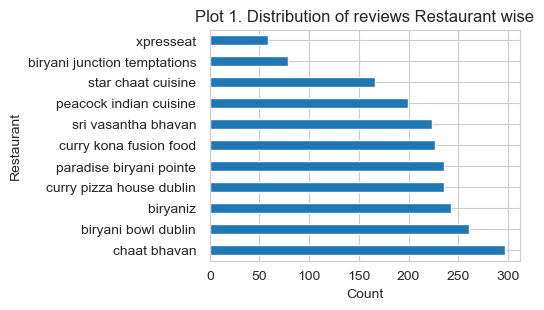

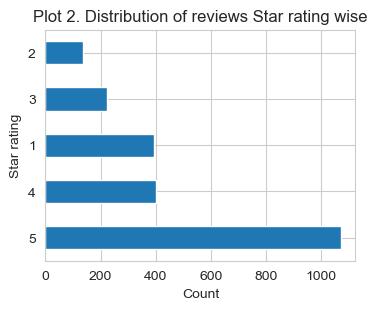



The descriptive statistics of the ratings 
*****************************************
count       5.000000
mean      445.400000
std       367.404818
min       138.000000
25%       223.000000
50%       394.000000
75%       401.000000
max      1071.000000
Name: count, dtype: float64
*****************************************
The Skewness in the data: 1.7187106862615886
The Kurtosis in the data: 3.2890719426880715


In [25]:
# Distribution of the restaurant reviews by name
plt.figure(figsize=(4,3))
restaurant_review_df['restaurant_name'].value_counts().plot.barh(x = "restaurant_name", y="count")
plt.title("Plot 1. Distribution of reviews Restaurant wise") # Title name of the plot.
plt.xlabel("Count")
plt.ylabel("Restaurant")
plt.show()

# Distribution of the restaurant reviews by name
plt.figure(figsize=(4,3))
restaurant_review_df['star_rating'].value_counts().plot.barh(x = "star_rating", y="count")
plt.title("Plot 2. Distribution of reviews Star rating wise") # Title name of the plot.
plt.xlabel("Count")
plt.ylabel("Star rating")
plt.show()

print("\n")
# Descriptive statistics of the Corpus
print('The descriptive statistics of the ratings ')
print('*****************************************')
print(restaurant_review_df['star_rating'].value_counts().describe())
print('*****************************************')
print('The Skewness in the data:',restaurant_review_df['star_rating'].value_counts().skew())
print('The Kurtosis in the data:', restaurant_review_df['star_rating'].value_counts().kurtosis())

> **Frequency Distribution plots to check the most commonly occurring terms**

>- The frequency distribution plots are plotted for the ***Cleaned-Corpus***,***Un-Cleaned-Corpus*** and the ***bigrams*** in the data.
>- This is done to understand the frequently occurring words, the top 25 words are plotted to see which one are more impactive.
>- The ***bi-grams*** are plotted to understand the ***collocation*** words in the corpus.

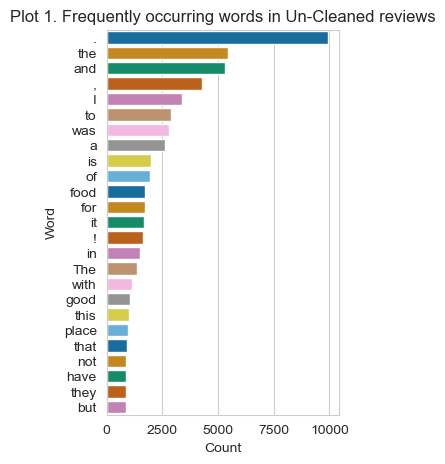

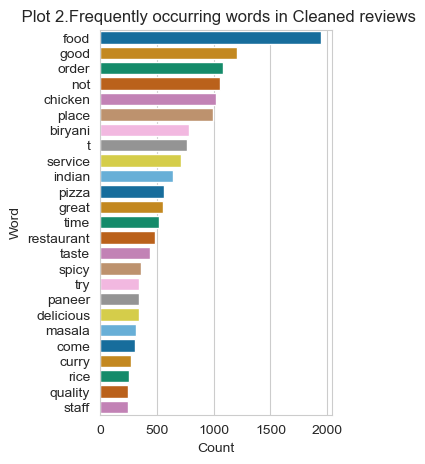

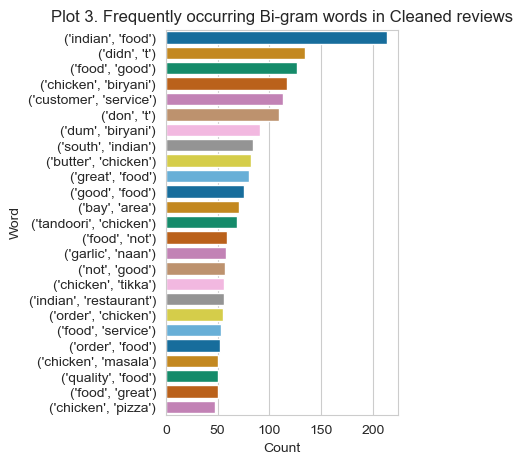

In [26]:
# Displaying the top 25 words in the  uncleaned corpus.
disp_freqwrds_plot(doc_text=restaurant_review_df.reviews,
                   title= "Plot 1. Frequently occurring words in Un-Cleaned reviews", terms = 25, grams= "")

# Displaying the top 25 words in the  Cleaned corpus.
disp_freqwrds_plot(doc_text=restaurant_review_df.cleaned_reviews,
                   title= " Plot 2.Frequently occurring words in Cleaned reviews", terms = 25, grams= "")

# Displaying the "Bigrams" in the cleaned reviews.
disp_freqwrds_plot(doc_text=restaurant_review_df.cleaned_reviews,
                   title= "Plot 3. Frequently occurring Bi-gram words in Cleaned reviews", terms = 25, grams= "bigrams")

> **Plotting the frequent words through WordCloud**

WordCloud is plotted to check the important words in the cleaned and uncleaned corpus.

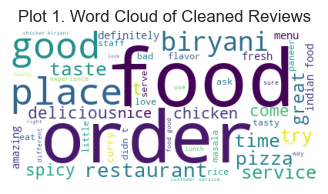

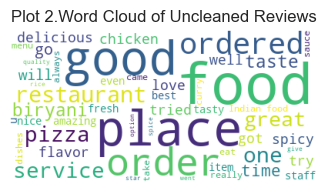

In [27]:
# Displaying the top frequent words in the cleaned corpus through WordCloud
disp_wordcloud_plot(doc_text=restaurant_review_df.cleaned_reviews,
                    title_st = "Plot 1. Word Cloud of Cleaned Reviews", max_wrds=50)

# Displaying the top frequent words in the uncleaned corpus through WordCloud
disp_wordcloud_plot(doc_text=restaurant_review_df.reviews,
                    title_st="Plot 2.Word Cloud of Uncleaned Reviews", max_wrds= 50)

### Topic  Modelling and Understanding different approaches.

<br>

In this part, the models are developed to label the topics that are most common in the documents and this is done through the application of the un-supervised learning methods like:
>>- **Latent Dirichlet Allocation (LDA)** and
  >>- **Non-negative Matrix Factorization (NMF)**.

> As we have no prior understanding about the underlying topics or no prior understanding about the topics to be focussed, this is assessed through the application of un-supervised topic modelling methods like the one shown below.
> **Latent Dirichlet Allocation (LDA)**: is a probabilistic model where each item of collection is modelled on the underlying topics, where the topics are modelled as infinite mixture of topic probabilities. The underlying idea is the documents which are a mixture of latent topics which are based on the underling distribution of words (Blei et al., 2003, pp. 994-996).
 The formula is mathematically denoted by:
 >> $p(θ,Z,W|α, β) = p(θ|α)\Pi^{N}_{n=1}p(z_{n}|θ)p(W_{n}|Z_{n},\beta)$, *****Note. Equation sourced from*****(Blei et al., 2003, p. 997)
 >>  - where $\alpha$ and $\beta$ are the parameters related priori of the corpus
   >>  - The variables $\theta$, $z$ and $w$ are the ones related to the document and word level variables.



**Topic Modelling using LDA and steps followed:**
>- The words are tokenized using the **simple_preprocess** from the gensim.utils to remove the punctuations and unwanted symbols.
>- Detection of the common phrases and multi-words collocation words using the **gensim.model.phrases**

|Parameters| Description                                                       |
|---------|-------------------------------------------------------------------|
|min_count| chosen **1**, words and bigrams below this word count are ingored |
|threshold| chosen at **3**, higher threshold means lower phrases             |
|delimiter| chosen **' '**, the collocations are joined by space              |
|`score`| Default chosen Normalise (pointwise) Mutual information **npmi** |

***Note**. Sourced from the gensim models documentation (Řehůřek & Sojka, 2010).
>- tokenizing, bi-gram model learning from the text to retain two adjacent words.
>- creating ***dictionary*** representation of the words and ***filtering*** the extremes.
>- Transforming the document to vectorized form using the function **doc2bow**.



In [28]:
# The words from the corpus review are tokenized and removed the unwanted symbols.
token_text = tokenized_text(list(restaurant_review_df.cleaned_reviews))
# The model is trained to detect the common phrases occurring in the text.
bigram_text = bigram_modl(token_text)

# Creating the dictionary and representation of the documents
id2word = corpora.Dictionary(bigram_text) # data from the bi-grams text.

# Filtering the words that has occurred in less than "10" documents and no more than 80% of the documents
# Keeping only the 100000 words.
id2word.filter_extremes(no_below=10, no_above=0.8, keep_n=100000)

# Create Corpus
texts = bigram_text #data_words_bigrams

# Transforming the words into vectorized form to convert into frequency of word representation (Bag of Words Representation).
corpus_text = [id2word.doc2bow(text) for text in texts]

# The terms frequency and the word's representation in the corpus
print ('\n********* word and their frequency representation in the corpus ******** ')
[[(id2word[ident_num], freq_num) for ident_num, freq_num in crps_text] for crps_text in corpus_text[1:2]]


********* word and their frequency representation in the corpus ******** 


[[('biryani', 1),
  ('delicious', 1),
  ('fresh', 1),
  ('plenty', 2),
  ('special', 1)]]

In [29]:
# length of the corpus text
len(corpus_text)

2227

> **Initialising the LDA model**
> - An LDA multicore is used with the removal of mini-batch application and with $\alpha$ auto-tuned.
> - A function to calculate the optimal topic number through iterative approach using the topic numbers in the model that generate the most optimal ***Coherence Score***. This is done as as a substitute to the cross-validation approach which can be impactive on the model.



> **LDA model Hyperparameter tuning**

| Hyper-parameter |Description and parameter|
|-----------------|-------------------------|
| Distributed     | used to multi-thread processing, not used due to inconsistent results despite seed setting.|
| Update_every:   |Number of documents learned in each iteration 0 is chosen for batch learning. 1 is for online learning which can handle large document sets, since our corpus is small batch is chosen(Hoffman et al., 2010).|
| Chunksize:      | determine the documents processed in the algorithm, influene the quality of the model based on the learning parameter (Hoffman et al., 2010, p. 7.).|
| Passes:         | The number of times algorithm experiences line before converging. (20 passes)|
| Alpha and Eta:  | The learning parameters of A-PRIORI based on the document and topic distribution.|

> ***Note***. Sourced from gensim models documentation (Řehůřek & Sojka, 2010).


In [30]:
# ------------------------------  Function to compute the Coherence score ---------------------------------
#----------------------------------------------------------------------------------------------------------
def calc_coherence_score(optimal_model,  id2word, bigram_text, coherence_typ, n_topics):

    coherence_model = CoherenceModel(model=optimal_model, texts=bigram_text, dictionary=id2word, coherence=coherence_typ).get_coherence()
    coh_score_dict = {"num_topic": n_topics, "coherence_score": coherence_model}
    return coh_score_dict


# -----------------  Function to compute the optimal model using the Coherence score ----------------------
#----------------------------------------------------------------------------------------------------------
def optimal_modl_lda(corpus_text, id2word, bigram_text, str_num, lmt_num, step_num):
    """
    This model take the corpus, dictionary and iteratively check the optimal model for given step
    and return the coherence score, which can be used in building the LDA model further.

    :param corpus_text: take the corpuus_text cleaned
    :param id2word: Dictionary representation of documents
    :param str_num: Start number
    :param lmt_num: Stop number
    :param step_num: Step size or incremental size
    :return: optimal_coherence_score_df, with number of topics and coherence score.
    """
    coherence_score = []
    for n_topics in tqdm(range(str_num, lmt_num, step_num)):
        lda_model_optimal = gensim.models.LdaModel(corpus=corpus_text, # Cleaned corpus from the above code.
                         id2word=id2word,
                         num_topics=n_topics, # Assembling the words into topics.
                         random_state=172, # A set seed is done for the reproducibility of the code.
                         update_every=0, # The documents that are iterated and used is "mini-batch iterative learning".
                         # workers= 3, # number of parallel processes
                         chunksize=100, # documents processed in the algorithm.
                         passes=20, # Documents processed at a instance in the algorithm
                         alpha='auto', # Learning parameters " A priori of the document distribution".
                         eta= 'auto', # learning parameters "A priori of the word distribution"
                         per_word_topics=True # Model computation of the topics and in descending order.
                                                )
        coherence_scre_dict = calc_coherence_score(optimal_model=lda_model_optimal,
                                                   id2word=id2word,
                                                   bigram_text = bigram_text,
                                                   coherence_typ= 'c_v',
                                                   n_topics = n_topics)
        coherence_score.append(coherence_scre_dict)

    optimal_cohrnce_score_df = pd.DataFrame.from_dict(coherence_score)

    return optimal_cohrnce_score_df


In [31]:
# -----------------  Function to Display the optimal model plot and Coherence Scores----------------------
#----------------------------------------------------------------------------------------------------------
def disp_optimal_modl_plot(optimal_coherence_score_df, title = " "):
    # Plotting the model to check the optimal score
    plt.plot(optimal_coherence_score_df.num_topic, optimal_coherence_score_df.coherence_score)
    plt.xlabel("Number of Topics") # X-label
    plt.ylabel("Coherence Scores") # Y-label title
    plt.title(title)
    plt.show()

    print("******************** Optimal model, number of topics and Coherence Score ********************")
    optimal_topic_num = optimal_coherence_score_df.num_topic[optimal_coherence_score_df.coherence_score == max(optimal_coherence_score_df.coherence_score)].values[0]
    optimal_cohenence_score = optimal_coherence_score_df.coherence_score[optimal_coherence_score_df.coherence_score == max(optimal_coherence_score_df.coherence_score)].values[0]
    print("\nTopics needed to produce optimal model: {}".format(optimal_topic_num))
    print("Topics Optimal Coherence score achieved for the model: {}".format(optimal_cohenence_score))
    print("********************************************************************************************")

    return optimal_topic_num

> **Optimal number of topics in LDA**
>- Optimal number of topics are chosen by iteratively going over the LDA model
>- The Coherence Score that yields highest for a given topics is chosen to be the optimal model.
>- The results might vary, even though the models are set with ***random_state***, which is used for reproducing the results.

100%|██████████| 14/14 [03:56<00:00, 16.93s/it]


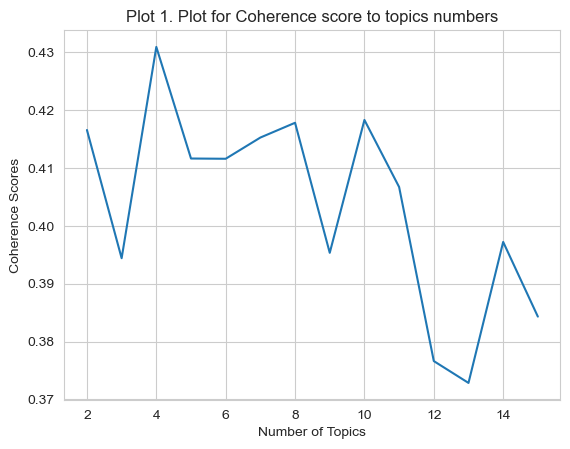

******************** Optimal model, number of topics and Coherence Score ********************

Topics needed to produce optimal model: 4
Topics Optimal Coherence score achieved for the model: 0.4309507886469897
********************************************************************************************


In [32]:
# # plotting the optimal model with the highest coherence score
optimal_coherence_lda_df = optimal_modl_lda(corpus_text = corpus_text,
                                              id2word = id2word,
                                              bigram_text = bigram_text,
                                              str_num=2, # Start of the topic number
                                              lmt_num=16, # End of the topic number at which iterations stop
                                              step_num=1) # Step size
optimal_topic_num = disp_optimal_modl_plot(optimal_coherence_lda_df, title = "Plot 1. Plot for Coherence score to topics numbers")

> **Training the LDA model on the corpus for the optimal topics numbers**
>- The optimal model is trained on the entire corpus which is retained from the cross validated number of ***optimal_modl_lda*** function output.

In [33]:
%%time
# Initialising the model using the "gensim.model"  and using the Bag of Words (BOW) frequency matrix.
n_topics = optimal_topic_num # number of topics chosen for the task
lda_model = gensim.models.LdaModel(corpus=corpus_text, # Cleaned corpus from the above code.
                     id2word=id2word,
                     num_topics=n_topics, # Assembling the words into topics.
                     random_state=172, # A set seed is done for the reproducibility of the code.
                     update_every=0, # The documents that are iterated and used is "mini-batch iterative learning".
                     # workers= 3, # number of parallel processes
                     chunksize=100, # documents processed in the algorithm.
                     passes=20, # Documents processed at a instance in the algorithm
                     alpha='auto', # Learning parameters " A priori of the document distribution".
                     eta= 'auto', # learning parameters "A priori of the word distribution"
                     per_word_topics=True # Model computation of the topics and in descending order.
                                            )

Wall time: 13.7 s


> **Displaying the topics with the top words in ascending order in the LDA model**

In [34]:
%%time
# Identifying and finding  the top most important words in the topics
print(lda_model.print_topics())
doc = lda_model[corpus_text]


[(0, '0.045*"pizza" + 0.029*"order" + 0.027*"food" + 0.024*"place" + 0.021*"chicken" + 0.018*"good" + 0.016*"not" + 0.015*"delicious" + 0.012*"great" + 0.012*"time"'), (1, '0.071*"food" + 0.053*"good" + 0.042*"place" + 0.021*"not" + 0.014*"great" + 0.013*"restaurant" + 0.012*"nice" + 0.012*"fresh" + 0.012*"service" + 0.011*"indian"'), (2, '0.078*"food" + 0.036*"order" + 0.034*"good" + 0.028*"place" + 0.024*"great" + 0.023*"not" + 0.022*"service" + 0.017*"restaurant" + 0.016*"time" + 0.012*"amazing"'), (3, '0.047*"biryani" + 0.045*"not" + 0.039*"food" + 0.038*"order" + 0.034*"good" + 0.023*"spicy" + 0.022*"place" + 0.017*"taste" + 0.016*"chicken" + 0.013*"time"')]
Wall time: 0 ns


> **Displaying the metrics like Perplexity and Coherence for the optimal LDA model**

In [35]:
#Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_text))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_lda = CoherenceModel(model=lda_model, texts=bigram_text, dictionary=id2word, coherence='c_v').get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.850447447025647

Coherence Score:  0.4309507886469897


> **Visualising the important topics from the LDA**


In [36]:
# visualising the important topics in the LDA model
# import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [37]:
# Visualising the important topics in the LDA model.
vis_lda = pyLDAvis.gensim.prepare(lda_model, corpus_text , id2word)
pyLDAvis.display(vis_lda)


>  **A function to print the important topics in the model and also word cloud**

In [38]:
def disp_imp_topics(model,  ncol, n_topics, top_n , max_wrds=1):

    """
    This function takes the parameters and model from the main function and
    displays the WordCloud and returns the dictionary with topics which can be used
    to build the dataframe.
    :param model: it can take gensim models
    :param nrow: number of rows
    :param ncol: number of columns
    :param n_topics: number topics chosen in the modelling.
    :param top_n: top number of words.
    :param max_wrds: maximum words to display.
    :return: topics with the important words: topic_dict is return variable.
    """
    topic_dict = {} # Initiating the dictionary
    plt.figure(figsize=(16,4))   # Setting the figure size
    # A for loop to iterate over the topics and to make the WordCloud.
    for i in tqdm(range(n_topics)):
        topic_dat = model.show_topic(i, topn = top_n) # the topic chosen at the iteration
        topic_modl = [i for i, n in topic_dat]  # building list for the topics
        topic_dict["Topic {}".format(i)] =  topic_modl # Assigning the list to dictionary.
        sub_text = ' '.join(word for word in topic_modl)
        word_cloud = WordCloud(max_words=max_wrds, background_color="white", contour_width=5,
                              stopwords = STOPWORDS, contour_color='steelblue').generate(sub_text)
        # Plotting the Word Cloud.
        time.sleep(1)
        # Plotting the figure
        plt.subplot((n_topics// ncol)+1,ncol, int(i+1)) # plotting the subplot
        plt.imshow(word_cloud, interpolation= "bilinear")
        plt.title("Topic {}".format(i))
        plt.axis("off")

    return topic_dict

> **Displaying the topics in the LDA model**

100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


,Topic 0,Topic 1,Topic 2,Topic 3
0,pizza,food,food,biryani
1,order,good,order,not
2,food,place,good,food
3,place,not,place,order
4,chicken,great,great,good


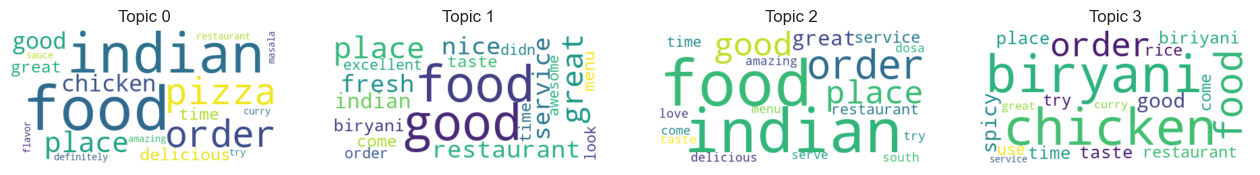

In [39]:
# Displaying the WordCloud for the "LDA Model"
topic_dict_lda = disp_imp_topics(model= lda_model, ncol=4, n_topics = n_topics, top_n = 20, max_wrds=20)
# Creating the DF for the important topics in the model.
topic_imp_lda_df = pd.DataFrame.from_dict(topic_dict_lda)
topic_imp_lda_df.head(5)

> **Topic modelling with Gensim using the Non-negative matrix Factorisation**
>
> **NMF**. is a dimensionality reduciton methods which recognises the latent topics representing the higher dimensionality matrix into lower dimesnion matrixes as a approximation of the document term matrix respresented by M=WH  (Helan & Sultani, 2023). Where W is word weightage matrix for each column  and His the row matrix of words embedded (Helan & Sultani, 2023).



In [40]:
# -------------Function to compute the optimal model using the Coherence score for NMF ----------------------
#-----------------------------------------------------------------------------------------------------------
def optimal_modl_nmf(corpus_text, id2word, bigram_text, str_num, lmt_num, step_num):
    """
    This model take the corpus, dictionary and iteratively check the optimal model for given step
    and return the coherence score, which can be used in building the LDA model further.

    :param corpus_text: take the coprus_text cleaned
    :param id2word: Dictionary representation of documents
    :param str_num: Start number
    :param lmt_num: Stop number
    :param step_num: Step size or incremental size
    :return: optimal_coherence_score_df, with number of topics and coherence score.
    """
    coherence_score = []
    for num_topics in tqdm(range(str_num, lmt_num, step_num)):
        nmf_model_optimal = gensim.models.nmf.Nmf(corpus=corpus_text, # Cleaned corpus from the above code.
                     id2word=id2word,
                     num_topics=num_topics, # Assembling the words into topics.
                     random_state=2389, # A set seed is done for the reproducibility of the code.
                     eval_every= 100, # The documents that are iterated and used is "mini-batch iterative learning".
                     # workers= 3, # number of parallel processes
                     chunksize=100, # documents processed in the algorithm.
                     kappa = 0.01, # The gradient descent step size determining model convergance.
                     passes=20, # Documents processed at a instance in the algorithm
                                  )
        coherence_scre_dict = calc_coherence_score(optimal_model=nmf_model_optimal,
                                                   id2word=id2word,
                                                   bigram_text = bigram_text,
                                                   coherence_typ= 'c_v',
                                                   n_topics = num_topics)
        coherence_score.append(coherence_scre_dict)

    optimal_cohrnce_score_df = pd.DataFrame.from_dict(coherence_score)

    return optimal_cohrnce_score_df

In [41]:
# # plotting the optimal model with the highest coherence score
optimal_coherence_nmf_df = optimal_modl_nmf(corpus_text = corpus_text,
                                              id2word = id2word,
                                              bigram_text = bigram_text,
                                              str_num=2,
                                              lmt_num=16,
                                              step_num=1)

100%|██████████| 14/14 [00:59<00:00,  4.25s/it]


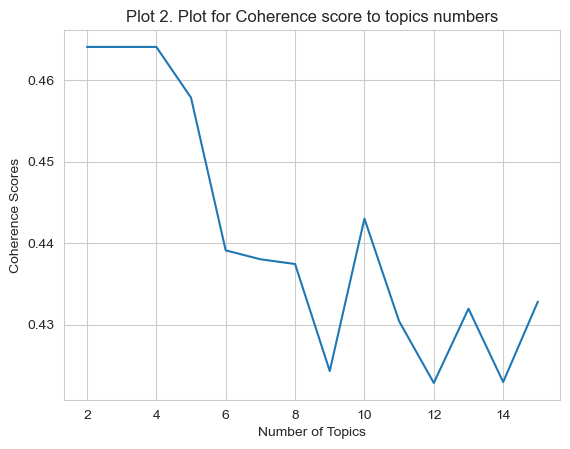

******************** Optimal model, number of topics and Coherence Score ********************

Topics needed to produce optimal model: 3
Topics Optimal Coherence score achieved for the model: 0.46405226454240406
********************************************************************************************


In [42]:
optimal_topic_num_nmf = disp_optimal_modl_plot(optimal_coherence_nmf_df, title = "Plot 2. Plot for Coherence score to topics numbers")

#### Training the NMF model on the corpus using the parameters from the optimal model

> - The optimal number of topics are chosen iteratively over the topics, the optimal model is the one with high coherence score.

In [43]:
%%time
# Initialising the model using the "gensim.model"  and using the Bag of Words (BOW) frequency matrix.
n_topics_nmf = optimal_topic_num_nmf # number of topics chosen for the task
nmf_model = gensim.models.nmf.Nmf(corpus=corpus_text, # Cleaned corpus from the above code.
                     id2word=id2word,
                     num_topics=n_topics_nmf, # Assembling the words into topics.
                     random_state=189, # A set seed is done for the reproducibility of the code.
                     eval_every= 20, # The documents that are iterated and used is "mini-batch iterative learning".
                     # workers= 3, # number of parallel processes
                     chunksize=50, # documents processed in the algorithm.
                     kappa = 0.01, # The gradient descent step size determining model convergance.
                     passes=20, # Documents processed at a instance in the algorithm
                                  )

Wall time: 901 ms


> **Displaying the topics in the NMF model**

In [44]:
# Printing the important topics in the NMF model
top_topic = 30 # Count of the topics
for i in range(0,len(nmf_model.print_topics())):
    topic_dat = nmf_model.show_topic(i, topn = top_topic) # the topic chosen at the iteration
    topic_modl = [i for i, n in topic_dat]  # building list for the topics
    print(topic_modl)


['food', 'good', 'order', 'place', 'not', 'biryani', 'great', 'restaurant', 'service', 'time', 'chicken', 'taste', 'spicy', 'delicious', 'come', 'try', 'nice', 'indian food', 'menu', 'indian', 'definitely', 'amazing', 'tasty', 'masala', 'pizza', 'rice', 'staff', 'use', 'eat', 'curry']
['food', 'good', 'order', 'place', 'not', 'biryani', 'great', 'restaurant', 'service', 'time', 'chicken', 'taste', 'spicy', 'delicious', 'come', 'try', 'nice', 'indian food', 'menu', 'indian', 'amazing', 'definitely', 'tasty', 'masala', 'pizza', 'rice', 'staff', 'use', 'eat', 'curry']
['food', 'good', 'order', 'place', 'not', 'biryani', 'great', 'restaurant', 'service', 'time', 'chicken', 'taste', 'spicy', 'delicious', 'come', 'try', 'nice', 'indian food', 'menu', 'indian', 'amazing', 'definitely', 'tasty', 'masala', 'pizza', 'rice', 'use', 'staff', 'eat', 'experience']


In [45]:
# Compute Coherence Score
coherence_nmf = CoherenceModel(model=nmf_model, texts=bigram_text, dictionary=id2word, coherence='c_v').get_coherence()
print('\nCoherence Score: ', coherence_nmf)


Coherence Score:  0.46405226454240395


> **Printing the WordCloud for the top 20 words in the NMF model**

> - The word cloud along with the topics that are important are shown in the optimal model.

100%|██████████| 3/3 [00:03<00:00,  1.08s/it]


,Topic 0,Topic 1,Topic 2
0,food,food,food
1,good,good,good
2,order,order,order
3,place,place,place
4,not,not,not


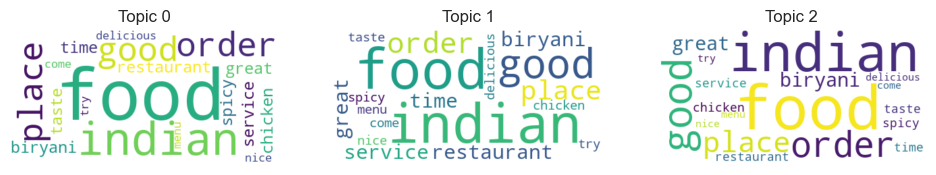

In [46]:
# Displaying the WordCloud for the "NMF Model"
topic_dict_nmf = disp_imp_topics(model= nmf_model, ncol=4, n_topics = n_topics_nmf, top_n = 20, max_wrds=20)
# Creating the DF for the important topics in the model.
topic_imp_nmf_df = pd.DataFrame.from_dict(topic_dict_nmf)

topic_imp_nmf_df.head(5)

> **Predicting the review's similarity to the topic in the models**
>- The reviews can give an insight into the customer thoughts and also into the topics or documents segregation by similarity.
>-  The reviews are analysed in both the models and the results along with review is printed to show the topic similarity and the topic it might belong to.

In [47]:
# ---------------------Function to predict the topic in the models from reviews-----------------------------
#-----------------------------------------------------------------------------------------------------------
def pred_review_to_simmod_topic(review_test, model, word_num, str_title):
    """
    The function take reviews and predicts the topic to which it belongs
    and prints the reviews and its closest
    """
    token_text_pred = tokenized_text(review_test)
    # The model is trained to detect the common phrases occurring in the text.
    bigram_text_pred = bigram_modl(token_text_pred)
    # Creating the dictionary and representation of the documents
    id2word_pred = corpora.Dictionary(bigram_text_pred) # data from the bi-grams text.
    # Create Corpus
    texts_pred = bigram_text_pred #data_words_bigrams
    # Transforming the words into vectorized form to convert into frequency of word representation (Bag of Words Representation).
    corpus_test_pred = [id2word_pred.doc2bow(text) for text in texts_pred]
    if model == lda_model:
        output_val = list(model[corpus_test_pred])[0][0] # predicting the topics from the review
    else:
        output_val = list(model[corpus_test_pred])[0]

    topics_similar = sorted(output_val, key=lambda x:x[1], reverse=True) # Sorting the review descending order.
    topic_num = topics_similar[0][0]
    print("\nThe Review is referring to the {} topic: {} \n".format(str_title, topic_num))
    print(review_test[0])
    print(model.show_topic(topic_num, topn = word_num))

> **Calling the function to predict the topics from a review in the model**

The function takes the reviews as the arguments and matches the topics in the models like "LDA" and "NMF" to produce the topics to which it is mostly related to based on the scores.

In [48]:
# The words from the corpus review are tokenized and removed the unwanted symbols.
review_test_pred = list(restaurant_review_df.reviews[restaurant_review_df.index == 2])

#Calling the function "pred_review_to_simmod_topic" for "LDA" model.
pred_review_to_simmod_topic(review_test=review_test_pred,
                            model=lda_model,
                            word_num=30, str_title = "LDA MODEL")

#Calling the function "pred_review_to_simmod_topic" for "LDA" model.
pred_review_to_simmod_topic(review_test=review_test_pred,
                            model=nmf_model,
                            word_num=30, str_title= "NMF model")


The Review is referring to the LDA MODEL topic: 2 

They have a good variety of food and bakery options. Most of the cakes we asked were eggless. They not only sell biryanis but they sell other sorts of foods (check menu)Food: 4/5
[('food', 0.07754946), ('order', 0.03617695), ('good', 0.03368118), ('place', 0.028049212), ('great', 0.023688808), ('not', 0.022811692), ('service', 0.022024399), ('restaurant', 0.017095668), ('time', 0.01563008), ('amazing', 0.011876144), ('delicious', 0.011789287), ('try', 0.010493273), ('come', 0.007998536), ('love', 0.0077627026), ('south indian', 0.007683102), ('indian food', 0.0075999293), ('serve', 0.006949047), ('taste', 0.0067657284), ('menu', 0.00666901), ('dosa', 0.006352047), ('bad', 0.006095072), ('tasty', 0.0060085496), ('staff', 0.0059468835), ('nice', 0.004790203), ('table', 0.004626283), ('ask', 0.0045965677), ('definitely', 0.004316991), ('enjoy', 0.0042376295), ('thali', 0.0041889274), ('little', 0.004132783)]

The Review is referring to 

#### Sentiment tagging of  the reviews.

>- The reviews are tagged with the **FLAIR** package which use the pre-trained models like the transformers for sequence tagging  and the classification of the text. The framework contains the standard models to train, in this case the model sentiment is estimated using the "FLAIR.nn" model. The sentiment analysis is done review dataset and is pretrained to to analyse our reviews.
>- The model is computationally efficient as per the authors and runs **"GPU and CPU"** and runs with 1024 hidden states (Akbik et al., 2019).

In [49]:
# -------Function to calculate the sentiment of the reviews either positive or negative--------------
# ---------------------------------------------------------------------------------------------------
def text_classifier_sentiment(corpus):
    """
    The function take the classifier from the flair package  which can be either
    transformer based or RNN based method which could sense the sentiment in reviews
    using the ML methods of word embedding.
    :param coprus:
    :return: classification_val: returns the values of classification.
    """

    # tagger is based on the transformer which has high accuracy
    tagger = Classifier.load('sentiment-fast')
    class_val = []
    class_score = []
    for ind in tqdm(range(0, len(corpus))):
        sentence = corpus[ind]
        sentence_test = Sentence(sentence)
        tagger.predict(sentence_test)
        if str(sentence_test.labels[0].value) == "POSITIVE":
            classification_val = "Positive"
            classification_score = sentence_test.score
        # else str(sentence_test.labels[0].value) == "NEGATIVE":
        else:
            classification_val = "Negative"
            classification_score = sentence_test.score
        # Appending the value to the list
        class_val.append(classification_val)
        class_score.append(classification_score)

    return class_val, class_score

In [50]:
# Calculating the sentiment analysis using the Flair model
restaurant_review_df['sentiment'], restaurant_review_df['sentiment_score'] = text_classifier_sentiment(restaurant_review_df['cleaned_reviews'])

100%|██████████| 2227/2227 [00:07<00:00, 289.50it/s]


#### Restaurant review data view after the calculation of the sentiment score

In [51]:
# Checking the dataframe after assigning the sentiment reviews.
restaurant_review_df.head(20)

,restaurant_name,reviews,rating,cleaned_reviews,star_rating,sentiment,sentiment_score
0,biryani junction temptations,Look how stunning the cake looks! It was made ...,100,stunning cake exactly picture share not beauti...,5,Positive,0.976249
1,biryani junction temptations,Fresh and delicious pastries. Plenty of option...,100,fresh delicious plenty goat ghee roast biryani...,5,Positive,0.999938
2,biryani junction temptations,They have a good variety of food and bakery op...,100,good variety food bakery ask eggless not menu ...,5,Positive,0.972302
3,biryani junction temptations,Their food and service is great. We love the g...,100,food service great ghee roast goat biriyani ty...,5,Positive,0.994372
4,biryani junction temptations,This place has the best butter chicken that I ...,100,place butter chicken butter chicken garlic naa...,5,Positive,0.865537
5,biryani junction temptations,Love the food here! Yummy and flavorful! Their...,100,food yummy flavorful tasty favorite gobi manch...,5,Positive,0.999483
6,biryani junction temptations,Food is delicious. And highly recommend the pi...,80,food delicious highly pistachio cake extremely...,4,Negative,0.650730
7,biryani junction temptations,Can I give less than a star? Why is this place...,20,star place rank high fake come place base rati...,1,Negative,0.999980
8,biryani junction temptations,In search of good indian chinese places in the...,60,search good indian chinese east bay land egg v...,3,Negative,0.974118
9,biryani junction temptations,I ordered a veggie and chicken dum biryani and...,20,order veggie chicken dum biryani soooo spicy t...,1,Positive,0.755150


> **Checking the Positive and Negative sentiment in all the star ratings**

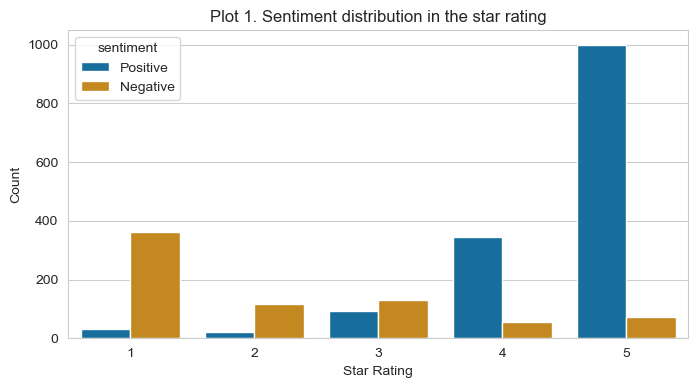

In [52]:
# The data for the sentiment to star rating visualisation.
df_counts = restaurant_review_df[['star_rating', 'sentiment']].value_counts().reset_index(name = 'counts')
plt.figure(figsize=(8, 4))
# Plotting the data using the SNS Barplots.
c_plot = sns.barplot(data = df_counts,
                     x = df_counts.star_rating,
                     y= df_counts.counts,
                     hue = df_counts.sentiment,
                    palette='colorblind') # Barplot assignment.
c_plot.axes.set_title("Plot 1. Sentiment distribution in the star rating") # Setting the title.
c_plot.axes.set_ylabel("Count") # Setting the "Y-label".
c_plot.axes.set_xlabel("Star Rating") #
plt.show()

In [53]:
# There are some five star rating that are negative
print("\n{x} Five star rating that are negative {x}".format(x = "*"*50))
print(restaurant_review_df.reviews[restaurant_review_df.index ==6].values[0])
print("\n",restaurant_review_df.cleaned_reviews[restaurant_review_df.index ==6].values[0])
print("\n{x} Negative review treated as positive {x}".format(x = "*"*50))
print(restaurant_review_df.reviews[restaurant_review_df.index ==9].values[0])
print("\n",restaurant_review_df.cleaned_reviews[restaurant_review_df.index ==9].values[0])


************************************************** Five star rating that are negative **************************************************
Food is delicious. And highly recommend the pistachio cake. Heads up - everything is extremely spicy. Like your mouth is on fire but in the best way possible. While my toddler didn't like that part, I did - so he can stick with the pistachio cake. My only negative is they are very inconsistent with their to go orders. We've eaten there a couple of times and each time they have forgotten sides. So while some of the dishes come with rice or naan, both times we've left without them. So check your order before you leave, and you'll leave happy. Ambience - not awesome. Feels bare. Def a take out joint.

 food delicious highly pistachio cake extremely spicy mouth fire way possible toddler didn t pistachio cake negative inconsistent eat couple time forget rice naan leave order happy ambience not awesome bare def joint

**************************************

#### Plotting the class distribution of sentiment  in the data and other metrics

>- The data is visualised to understand the class distribution in the model through bar plots.
>- The data is also checked for the word-count distribution in the corpus with descriptive statistics and visually through the ***histogram***

In [54]:
# -------Function to calculate the sentiment of the reviews either positive or negative--------------
# ---------------------------------------------------------------------------------------------------
# Plotting the figure to show the sentiment distribution in the data.
def disp_barplot_review_dat(review_df, x_val, title_val):

    plt.figure(figsize=(5, 3))
    # Plotting the data using the SNS Barplots.
    b_plot = sns.countplot(data = review_df, x = str(x_val), palette='colorblind') # Barplot assignment.
    b_plot.axes.set_title(title_val) # Setting the title.
    b_plot.axes.set_ylabel("Count") # Setting the "Y-label".
    b_plot.axes.set_xlabel("Sentiment") #
    for br in b_plot.patches:
        prcnt = '{:.2f}%'.format(br.get_height()/len(review_df))
        x = br.get_x()+br.get_width()
        y = br.get_height()
        b_plot.annotate(prcnt, (x,y), ha= 'right')
    plt.show() # Displaying the plot


    # Printing the values count of the class distribution in the data

    print('The distribution of classes and their counts')
    print('*********************************************')
    print(review_df[x_val].value_counts())
    print('*********************************************')




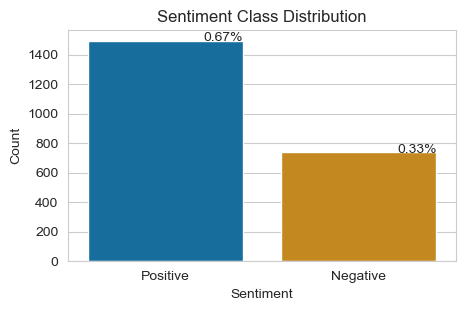

The distribution of classes and their counts
*********************************************
sentiment
Positive    1490
Negative     737
Name: count, dtype: int64
*********************************************


In [55]:
# Plotting the sentiment data in each class.
disp_barplot_review_dat(review_df=restaurant_review_df, x_val ='sentiment', title_val= "Sentiment Class Distribution")

> **Plotting the data to check the word distribution using historgram**

<Figure size 400x200 with 0 Axes>

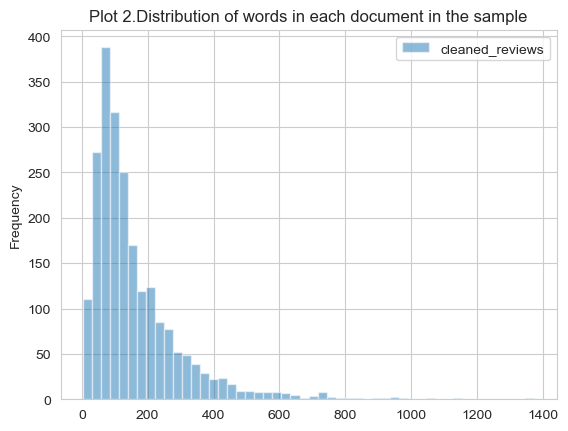



The descriptive statistics of the Corpus
*****************************************
       cleaned_reviews
count      2227.000000
mean        159.146385
std         137.811130
min           4.000000
25%          70.000000
50%         116.000000
75%         205.000000
max        1373.000000
*****************************************
The Skewness in the data: cleaned_reviews    2.459439
dtype: float64
The Kurtosis in the data: cleaned_reviews    9.327205
dtype: float64


In [56]:
# A histogram to show the word distribution in the corpus.
df_corpus_len = pd.DataFrame(restaurant_review_df['cleaned_reviews'].str.len())
disp_hist_descriptve_stats(df_corpus_len=df_corpus_len, title="Plot 2.Distribution of words in each document in the sample")


#### Plotting the keywords in the positive and Negative reviews using WordCloud


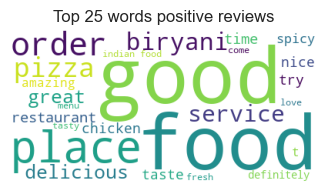

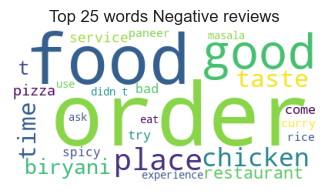

In [57]:
# Plotting the keywords in the positive reviews.
doc_text_positive = restaurant_review_df.cleaned_reviews[restaurant_review_df.sentiment == 'Positive']
disp_wordcloud_plot(doc_text=doc_text_positive, title_st="Top 25 words positive reviews", max_wrds=25)
# Plotting the keywords in the negative reviews.
doc_text_negative = restaurant_review_df.cleaned_reviews[restaurant_review_df.sentiment == 'Negative']
disp_wordcloud_plot(doc_text=doc_text_negative, title_st="Top 25 words Negative reviews", max_wrds=25)

#### Building the Classifier model based on the sentiment

Methods followed:
>- A ***stratified*** based approach is used where the class have weightage in the model.
>- A ***Term Frequency in Inverse Document Frequency (TFIDF)*** is used to represent the words in the document into sparse matrix.
>- The model is assessed  through the non-parametric tree based model like ***XGBoost classifier***.
>- The efficiency of the model is assessed through the prediction and ***confusion matrix*** and evaluation metrics
>-  A positive and negative review are used from real world example to assess the model prediction and also the topics that the model can predict.

##### The data is split based on the classification into train and test

>- The model is split into ***80:20*** split.
>- As the classes are imbalanced the stratified model can give weightage to the classes.

In [58]:
restaurant_review_df_two = restaurant_review_df.copy()

In [79]:
# Splitting the data into train and test using the stratified sampling method.
y_resp = restaurant_review_df.sentiment # response value
review_train, review_test, y_train, y_test = train_test_split(restaurant_review_df['cleaned_reviews'],y_resp,
                                                             test_size=0.2, # size of the split
                                                              random_state=178,
                                                             stratify=y_resp)


In [80]:
# Resetting the index after the splitting for the train data
review_train = review_train.to_frame()  # Converting to Dataframe.
review_train = review_train.reset_index() # resetting the index.
review_train =  review_train.drop('index', axis=1) # Drop the index after resetting.

# Resetting the index after the splitting for the test data
review_test = review_test.to_frame()  # converting to Dataframe
review_test = review_test.reset_index() # resetting the index.
review_test =  review_test.drop('index', axis=1) # Drop the index after resetting.

# Converting to dataframe after splitting in response train data and dropping index.
y_train = y_train.to_frame().reset_index() # Conversion to dataframe
y_train = y_train.drop('index', axis =1) # Dropping the index.

# Converting to dataframe after splitting in response train data and dropping index.
y_test = y_test.to_frame().reset_index() # Conversion to dataframe
y_test = y_test.drop('index', axis =1) # Dropping the index.

In [81]:
# Checking the shape of the data after splitting.
print("{x}".format( x="*"*40))
print("shape of the train data: ",review_train.shape)
print("\n{x}".format( x="*"*40))
print("shape of the test data: ", review_test.shape)

****************************************
shape of the train data:  (1781, 1)

****************************************
shape of the test data:  (446, 1)


<Figure size 400x200 with 0 Axes>

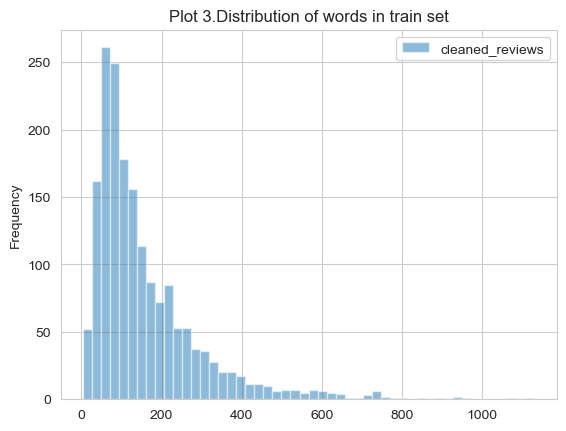



The descriptive statistics of the Corpus
*****************************************
       cleaned_reviews
count      1781.000000
mean        159.544638
std         138.419939
min           4.000000
25%          69.000000
50%         116.000000
75%         208.000000
max        1130.000000
*****************************************
The Skewness in the data: cleaned_reviews    2.284987
dtype: float64
The Kurtosis in the data: cleaned_reviews    7.274161
dtype: float64


In [82]:
# A histogram to show the word distribution in the corpus.
df_corpus_train_len = pd.DataFrame(review_train.cleaned_reviews.str.len())
disp_hist_descriptve_stats(df_corpus_len=df_corpus_train_len, title="Plot 3.Distribution of words in train set")

<Figure size 400x200 with 0 Axes>

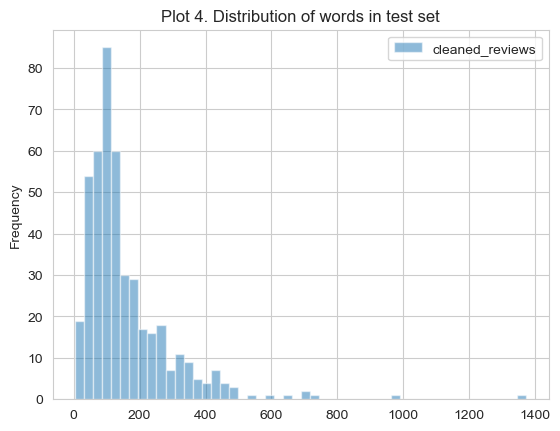



The descriptive statistics of the Corpus
*****************************************
       cleaned_reviews
count       446.000000
mean        157.556054
std         135.494385
min           5.000000
25%          77.250000
50%         116.000000
75%         194.000000
max        1373.000000
*****************************************
The Skewness in the data: cleaned_reviews    3.211903
dtype: float64
The Kurtosis in the data: cleaned_reviews    18.503086
dtype: float64


In [83]:
# A histogram to show the word distribution in the corpus.
df_corpus_test_len = pd.DataFrame(review_test.cleaned_reviews.str.len())
disp_hist_descriptve_stats(df_corpus_len=df_corpus_test_len, title="Plot 4. Distribution of words in test set")

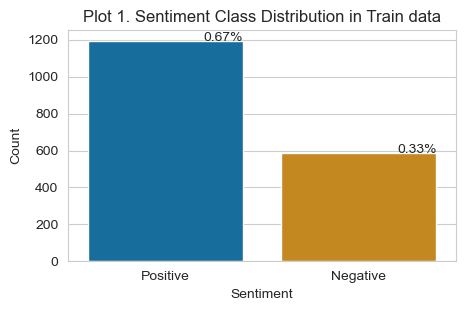

The distribution of classes and their counts
*********************************************
sentiment
Positive    1192
Negative     589
Name: count, dtype: int64
*********************************************


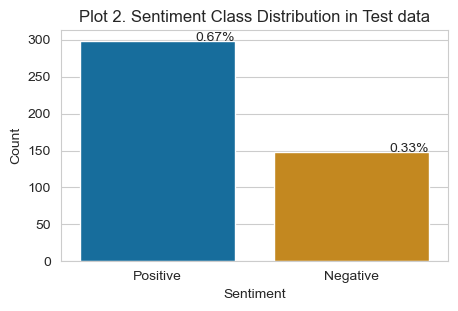

The distribution of classes and their counts
*********************************************
sentiment
Positive    298
Negative    148
Name: count, dtype: int64
*********************************************


In [84]:
# Plotting the sentiment data in each class in train data.
disp_barplot_review_dat(review_df=y_train, x_val ='sentiment', title_val= "Plot 1. Sentiment Class Distribution in Train data")

# Plotting the sentiment data in each class in test data.
disp_barplot_review_dat(review_df=y_test, x_val ='sentiment', title_val= "Plot 2. Sentiment Class Distribution in Test data")


### TFIDF Vectorizing is done on the train and test data, the sparse matrix will be used in classification algorithms

>  **The hyper-parameters chosen for the task**

| Parameter | Description- chosen value                                         |
|-----------|-------------------------------------------------------------------|
|`max_df` | Terms above the threshold are ingored (0.8)                       |
|`min_df`| Terms are not considered below this threshold (3)                 |
|`max_features`| Maximum number of features chosen (500 to 1000)                   |
|`ngram_range`| The lower and upper boundary of the collocations or bigrams (1,2) |
|`'l2'` norm| The normalisation chosen is based on the cosine similarity        |

***Note***. Sourced from Scikit learn (Pedregosa et al., 2011).

>- On the training data `fit_transform` is used. If ***fit_transform*** is used on the entire corpus could lead to different results.
>-  On the test data `transform` is used.


In [85]:
# TFIDF vectorization using the TFIDF vectorizer from the scikit
tfidf_vec = TfidfVectorizer(
    min_df = 3, # The terms below threshold are not considered for analysis
    max_df = 0.80, # The terms above the threshold are ignored
    ngram_range = (1,2), # either un-igram or bi-gram chosen as collocation of words.
    max_features = 500, # The feature representation in the matrix.
    norm = 'l2', # The normalisation "l2" is chosen based on the cosine similarity.
    stop_words = 'english' # The stop words used.
)

# building the fit and transform by training the model.
review_train_tfidf = tfidf_vec.fit_transform(review_train.cleaned_reviews)
# Fitting the test data using transform which is based on the learned model from "fit_transform".
review_test_tfidf = tfidf_vec.transform(review_test.cleaned_reviews) # Only transform is used

# label encoding the data for the train and test response data
label_encdr = LabelEncoder() # Initialising the label encoder
y_review_lbl_enc_train = label_encdr.fit_transform(y_train.sentiment) # label encoding for test data.
y_review_lbl_enc_test = label_encdr.fit_transform(y_test.sentiment) # label encoding for test data.

In [86]:
# printing the shape of the data after the training
print("{x:} shape of the data with features {y:}".format(x = "*"*8, y = "*"*8))
print("The shape of train TFIDF matrix: {}". format(review_train_tfidf.shape))
print("The shape of test TFIDF matrix: {}". format(review_test_tfidf.shape))
print("{x:}".format(x = "*"*50))
print(tfidf_vec.get_feature_names_out()[:50])

******** shape of the data with features ********
The shape of train TFIDF matrix: (1781, 500)
The shape of test TFIDF matrix: (446, 500)
**************************************************
['able' 'absolutely' 'achari' 'actually' 'add' 'ago' 'aloo' 'amazing'
 'amazing food' 'ambiance' 'ambience' 'amritsari' 'appetizer' 'area'
 'arrive' 'ask' 'authentic' 'available' 'average' 'away' 'awesome' 'bad'
 'base' 'basket' 'bay' 'bay area' 'bhature' 'bhavan' 'bhel' 'big'
 'biriyani' 'biryani' 'biryani bowl' 'biryani chicken' 'biryani good'
 'biryani place' 'biryaniz' 'bit' 'bite' 'bland' 'boneless'
 'boneless chicken' 'bowl' 'box' 'bread' 'breakfast' 'bring' 'briyani'
 'buffet' 'burger']


> The training data from the ***TFIDF and Label encoded*** is assigned as dictionary for further usage.
> The data has some class im-balance and the weights are calculated and used further in the model.

In [87]:
# Assigning the TFIDF train and test data, label encoded data of train and test into dictionary.
training_data = {'x_train':review_train_tfidf,
                 'y_train':y_review_lbl_enc_train,
                'x_test': review_test_tfidf,
                 'y_test':y_review_lbl_enc_test}
# Calculating the class weights in the data.
cls_imb_weight = class_weight.compute_sample_weight(class_weight='balanced', y = training_data['y_train'])
# Enumerating the class weights
cls_weight = dict(enumerate(cls_imb_weight))

#### Function to calculate the evaluation metrics and confusion matrix is displayed for the data

In [106]:
# A function to calculate the evaluation metrics for the training and test daa
def get_conf_metric(model, review_tfidf, y_review, title_plot, target_val ):

    ## Predicting the model on the test data
    pred_val = model.predict(review_tfidf)
    # Evaluation metrics confusion matrix and classification report.
    conf_matrix_nmf = classification_report(pred_val, y_review, target_names = target_val )
    print('{x}'.format(x = '*' * 50))
    print(conf_matrix_nmf) # Printing the confusion matrix with evaluation metrics.
    # Plotting the confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ConfusionMatrixDisplay.from_predictions(y_review, pred_val, ax=ax, colorbar='colorblind')
    ax.xaxis.set_ticklabels(['Negative', 'Positive']) # Assigning labels of the classes.
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    plt.title(title_plot)
    plt.show()

### The classification model is build using the tree based ensemble methods

> The methods followed for classification:
>- A tree based ensemble methods are chosen for the task which can handle the class imbalance and skewness in the data.
>- A ***XGBoost classifier and RandomForest*** are chosen for the task.
>- A class imbalance weights are calculated and used in the model.
>

XGBoost classifier Hyper-parameters

| Parameters                   | Description-Values                                                            |
|------------------------------|-------------------------------------------------------------------------------|
| `"learning_rate"`            | Step size of the shrinkage, stops model from over-fitting. `[0.1]`            |
| `"gamma"`                    | minimum loss reduction at the split.                                          |
| `"max_depth"`                | maximum depth of tree, increased values can overfit[3, 4, 5, 6]               |
| `"min_child_weight"`         | The minimum hessian weights in a child for building tree                      |
| `"subsample":`               | The sub sampling occurring in each iteration, the weight of sample considered |
| `"colsample_bytree"`         | sub-sample ratio for every tree constructed.                                  |
| `CV`                         | A 5 fold cross validation is used                                             |
| `"objective= "binary:logistics"` | A logistics regression binary classification is used                          |
|`scale_pos_weight` | (len(y_train.sentiment[y_train.sentiment == 'Negative'])/len(y_train.sentiment[y_train.sentiment == 'Positive']))**0.5|

***Note***.Sourced from (xgboost-developers, 2023)

In [89]:

weight_val = (len(y_train.sentiment[y_train.sentiment == 'Negative'])/len(y_train.sentiment[y_train.sentiment == 'Positive']))**0.5
## Grid Parameters for the XGBoost
param_grid_xgb= {
    "learning_rate": [0.01], # Step size of the shrinkage, stops model from over-fitting.
    "gamma": [1], # minimum loss reduction at the split.
    "max_depth": [3, 4, 5, 6], # maximum depth of the tree
    "min_child_weight": [1, 3, 5], # minimum instance hessian weight in the tree.
    "subsample": [0.6,0.7],    # sub-sample occurs once in each boosting and prevents over-fitting.
    "colsample_bytree": [0.8],  # sub-sample ratio for every tree constructed.
}

#  XGBoost classifier initialised
xg_boost_cl = XGBClassifier(n_estimators=300, # number of estimator at gradient boosting
                         objective = "binary:logistic", # The class is dichotomous a "binary logistic model is used"
                         seed = 2391, # Setting the seed to reproduce results.
                         nthread = 4, # number of thread assigned.
                         max_delta_step = 1,
                        scale_pos_weight = weight_val # Class weight proportionate to class distribution.
                        )

# Grid Search model initiation to find the optimal model to be used to build better model.
grid_search_clf = GridSearchCV(estimator=xg_boost_cl,
                               n_jobs = -1,                  # No parallel processing is used
                               param_grid = param_grid_xgb,  # Parameters in the grid search
                               scoring = 'roc_auc',          #  Area under the curve for evaluation metric
                               cv = 5,                       # cross validation parameter.
                               verbose = 1)

# Fitting the model for XGBoost classifier
grid_search_clf.fit(training_data['x_train'], training_data['y_train'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_depth=None, max_leaves=None,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     n_estimators=300, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [1],
                         'learning_rate': [0.01], 'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 5],
                         'subsample': [0.6, 0.7]},
             scoring='roc_auc', verbose=1)

In [90]:
# The best model from the cross validation is used to fit the data
best_xgb_modl = grid_search_clf.best_estimator_  # Best estimators in the model
# fitting the XGBoost model with best parameters.
best_xgb_modl.fit(training_data['x_train'],
                 training_data['y_train']
                )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
              max_depth=6, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=300, n_jobs=None,
              nthread=4, num_parallel_tree=None, predictor=None, ...)

### Displaying the top 15 important features in the model.

In [91]:
# The important features in the model are shown below
important_features = [{"features":feature_names, "feature_value": round(imp_val,10)} for feature_names, imp_val in zip(list(tfidf_vec.get_feature_names_out()),list(best_xgb_modl.feature_importances_))]
# Sorting the feature values by the score
new_important_features = sorted(important_features, key = lambda x:x['feature_value'], reverse=True)

# making data frame of the important features
impfeature_df = pd.DataFrame.from_dict(new_important_features)
# Displaying the top 10 important features
impfeature_df.head(20)

,features,feature_value
0,bad,0.017570
1,delicious,0.016706
2,order,0.016400
3,old,0.015321
4,great,0.015208
5,amazing,0.012987
6,horrible,0.012551
7,phone,0.011740
8,wait,0.011579
9,terrible,0.011432


**************************************************
              precision    recall  f1-score   support

     class 1       0.74      0.83      0.78       519
     class 0       0.93      0.88      0.90      1262

    accuracy                           0.86      1781
   macro avg       0.83      0.86      0.84      1781
weighted avg       0.87      0.86      0.87      1781



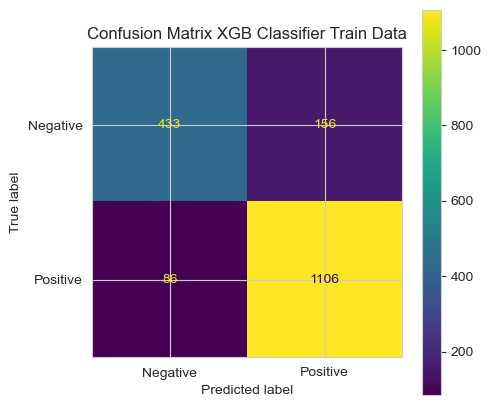

In [107]:
# The evaluation metrics for the training data XGB classifier.
get_conf_metric(best_xgb_modl, training_data['x_train'],
                 training_data['y_train'], title_plot = "Confusion Matrix XGB Classifier Train Data",
                target_val = ['class 1', 'class 0']) # The class of interest is the negative class

**************************************************
              precision    recall  f1-score   support

     class 1       0.66      0.75      0.71       130
     class 0       0.89      0.84      0.87       316

    accuracy                           0.82       446
   macro avg       0.78      0.80      0.79       446
weighted avg       0.83      0.82      0.82       446



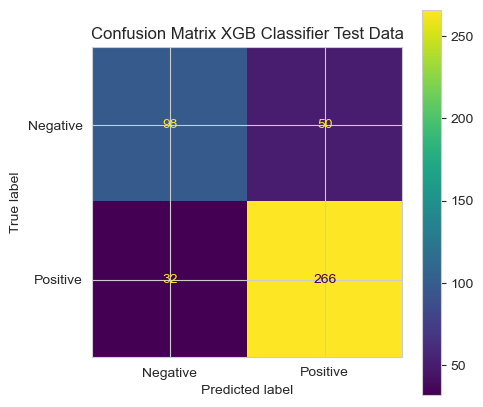

In [108]:
# The evaluation metrics for the XGB classifier test data.
get_conf_metric(best_xgb_modl, training_data['x_test'],
                 training_data['y_test'], title_plot = "Confusion Matrix XGB Classifier Test Data",
                target_val = ['class 1', 'class 0']) # The class of interest is the negative class)

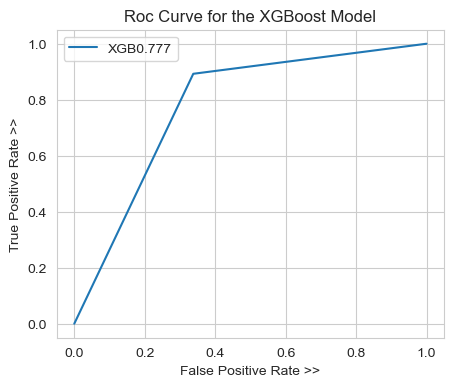

In [94]:
# Plotting the Receiver operating characteristic Curve
pred_val = best_xgb_modl.predict(training_data['x_test'])
# Calculating the ROC curve and Area Under the Curve
xgb_fprate, xgb_tprate, threshold_val = roc_curve(training_data['y_test'], pred_val)
xgb_aucurve = auc(xgb_fprate, xgb_tprate)
plt.figure(figsize=(5,4))
plt.plot(xgb_fprate, xgb_tprate, linestyle = "-", label = "XGB{x:0.3f}".format(x = xgb_aucurve))
plt.xlabel("False Positive Rate >>")
plt.ylabel("True Positive Rate >>")
plt.title ("Roc Curve for the XGBoost Model")
plt.legend()
plt.show()

#### Building Model using the Random Forest Classifier


The parameters chosen and the settings

|Parameters| Description-values                                                     |
|----------|------------------------------------------------------------------------|
|`"max_depth"`| maximum depth of the tree, if not assigned tree grown to maximum size. |
|`"min_samples_split"`| minimum number of sample to split the node.                            |
|`"max_features": ['sqrt']`| Max features considered at each split `mtry` classification ***Sqrt of features***|

In [95]:
## Grid Parameters for the Random Forest classifier
param_grid_rf= {
    "max_depth": list(np.arange(3,10,1)), # maximum depth of the tree, if not assigned tree grown to maximum size.
    "min_samples_split": list(np.arange(3,10,1)), # minimum number of sample to split the node.
    "max_features": ['sqrt']

}


# Initialising the Random Forest Classifier.
random_forest_cl = RandomForestClassifier(n_jobs=4, # number of parallel processes to rum
                                    class_weight = cls_weight, # Class Imbalanced weights assigned to model
                                    random_state=2378, # Random seed for reproducing the results
                                    verbose=1

                                     )

# Grid Search model initiation to find the optimal model to be used to build better model.
grid_search_clf_rf = GridSearchCV(estimator=random_forest_cl ,
                               n_jobs = -1,                  # No parallel processing is used
                               param_grid = param_grid_rf,  # Parameters in the grid search
                               scoring = 'roc_auc',          #  Area under the curve for evaluation metric
                               cv = 5,                       # cross validation parameter.
                               verbose = 1)

# Fitting the model for XGBoost classifier
grid_search_clf_rf.fit(training_data['x_train'], training_data['y_train'])

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.7470637583892618,
                                                            1: 0.7470637583892618,
                                                            2: 0.7470637583892618,
                                                            3: 0.7470637583892618,
                                                            4: 0.7470637583892618,
                                                            5: 0.7470637583892618,
                                                            6: 1.5118845500848896,
                                                            7: 0.7470637583892618,
                                                            8: 0.7470637583892618,
                                                            9: 0.7470637583892618,
                                                            10: 0.7470637583892618,
                                                            11: 0.7470637583892618,
                                                            12: 0.7470637583892618,
                                                            13: 0.7470...
                                                            22: 0.7470637583892618,
                                                            23: 0.7470637583892618,
                                                            24: 0.7470637583892618,
                                                            25: 0.7470637583892618,
                                                            26: 0.7470637583892618,
                                                            27: 1.5118845500848896,
                                                            28: 1.5118845500848896,
                                                            29: 1.5118845500848896, ...},
                                              n_jobs=4, random_state=2378,
                                              verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt'],
                         'min_samples_split': [3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc', verbose=1)

In [96]:
# The best model from the cross validation is used to fit the data
best_rf_modl = grid_search_clf_rf.best_estimator_  # Best estimators in the model
# fitting the RF model with best parameters.
best_rf_modl.fit(training_data['x_train'],
                 training_data['y_train']
                )

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(class_weight={0: 0.7470637583892618,
                                     1: 0.7470637583892618,
                                     2: 0.7470637583892618,
                                     3: 0.7470637583892618,
                                     4: 0.7470637583892618,
                                     5: 0.7470637583892618,
                                     6: 1.5118845500848896,
                                     7: 0.7470637583892618,
                                     8: 0.7470637583892618,
                                     9: 0.7470637583892618,
                                     10: 0.7470637583892618,
                                     11: 0.7470637583892618,
                                     12: 0.7470637583892618,
                                     13: 0.7470637583892618,
                                     14: 0.7470637583...
                                     17: 0.7470637583892618,
                                     18: 1.5118845500848896,
                                     19: 1.5118845500848896,
                                     20: 0.7470637583892618,
                                     21: 0.7470637583892618,
                                     22: 0.7470637583892618,
                                     23: 0.7470637583892618,
                                     24: 0.7470637583892618,
                                     25: 0.7470637583892618,
                                     26: 0.7470637583892618,
                                     27: 1.5118845500848896,
                                     28: 1.5118845500848896,
                                     29: 1.5118845500848896, ...},
                       max_depth=8, min_samples_split=9, n_jobs=4,
                       random_state=2378, verbose=1)

#### Calculation of evaluation metrics for the Random Forest classifier.

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


**************************************************
              precision    recall  f1-score   support

     class 1       0.39      1.00      0.56       229
     class 0       1.00      0.77      0.87      1552

    accuracy                           0.80      1781
   macro avg       0.69      0.88      0.71      1781
weighted avg       0.92      0.80      0.83      1781



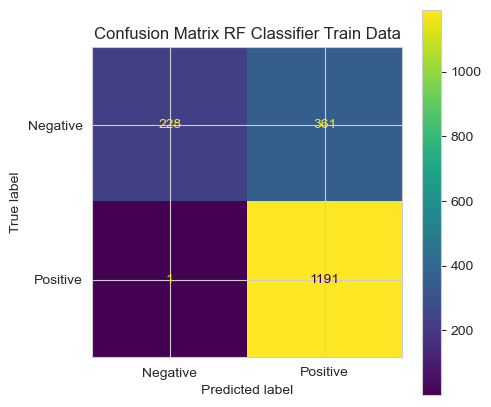

In [109]:
# The evaluation metrics for the training data Random Forest Classifier.
get_conf_metric(best_rf_modl, training_data['x_train'],
                 training_data['y_train'], title_plot = "Confusion Matrix RF Classifier Train Data",
                target_val = ['class 1', 'class 0']) # The class of interest is the negative class)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


**************************************************
              precision    recall  f1-score   support

     class 1       0.30      0.94      0.45        47
     class 0       0.99      0.74      0.85       399

    accuracy                           0.76       446
   macro avg       0.64      0.84      0.65       446
weighted avg       0.92      0.76      0.80       446



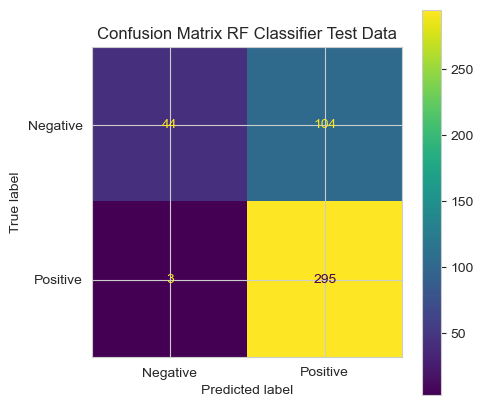

In [110]:
# The evaluation metrics for the test data Random Forest Classifier.
get_conf_metric(best_rf_modl, training_data['x_test'],
                 training_data['y_test'], title_plot = "Confusion Matrix RF Classifier Test Data",
                target_val = ['class 1', 'class 0']) # The class of interest is the negative class)

> **A positive and Negative sentiment review which the model has not seen before**
>- **A function to calculate the sentiment**
>- **A function to calculate the topics to which it belongs to**

In [137]:
## The function take the words and print out the sentiment
def pred_sentiment_val(review_test_pred_val, modl, labl_encdr):
    review_test_pred_val = cleaning_text_content(review_test_pred_val )
    test_fin_pred = tfidf_vec.transform(review_test_pred_val)
    pred_val_test = modl.predict(test_fin_pred)
    value_pred = labl_encdr.inverse_transform(pred_val_test)[0]
    print("\n{x}The Sentiment of the model{x}".format(x = "*" * 25))
    print("The sentiment of the model is : {x}".format(x = value_pred))
    print("\n{x}".format(x = "*"*80))

> **Positive review and predicitons**

In [142]:
# The words from the corpus review are tokenized and removed the unwanted symbols.
# This review was never seen by the model before and is only test purposes.

#-----------A positive review----------------------------------
#--------------------------------------------------------------
review_test_pred = ["The restaurant has good food, their dishes are good and not too spicy. I would recommend this place to a friend."]

# predicting the sentiment from the tweet.
pred_sentiment_val(review_test_pred,
                   modl= best_xgb_modl,
                   labl_encdr= label_encdr)
#Calling the function "pred_review_to_simmod_topic" for "LDA" model.
pred_review_to_simmod_topic(review_test= review_test_pred,
                            model=lda_model,
                            word_num=30, str_title = "LDA MODEL")

100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


*************************The Sentiment of the model*************************
The sentiment of the model is : Positive

********************************************************************************

The Review is referring to the LDA MODEL topic: 3 

The restaurant has good food, their dishes are good and not too spicy. I would recommend this place to a friend.
[('biryani', 0.046567623), ('not', 0.044841498), ('food', 0.03875527), ('order', 0.037607357), ('good', 0.034197606), ('spicy', 0.02305152), ('place', 0.021717845), ('taste', 0.016769983), ('chicken', 0.01615146), ('time', 0.01289644), ('biriyani', 0.010175909), ('restaurant', 0.009399126), ('rice', 0.009183451), ('try', 0.008650654), ('use', 0.008213374), ('chicken biryani', 0.00780151), ('come', 0.0077041592), ('great', 0.0067441305), ('curry', 0.0061675943), ('service', 0.0058322833), ('paneer', 0.00571404), ('masala', 0.00531832), ('tasty', 0.004876472), ('experience', 0.004671684), ('overall', 0.004641521), ('naan', 0.00

> **Negative review and predictions**

In [143]:
# The words from the corpus review are tokenized and removed the unwanted symbols.
# This review was never seen by the model before and is only test purposes.

# --------------------------A negative review------------------------------------
#--------------------------------------------------------------------------------
# review_test_pred = ["The restaurant is good with ambience, the south-indian food is real bad. I will not go this place again."]
review_test_pred = ["I ordered a veggie and chicken dum biryani and it was soooo spicy and doesn't taste anything close to a dum biryani. I think they put a lot of curry powder in the biryani rather than the actual spices. Wouldn't recommend this place for a true biryani lover."]

# predicting the sentiment from the tweet.
pred_sentiment_val(review_test_pred,
                   modl= best_xgb_modl,
                   labl_encdr= label_encdr)
#Calling the function "pred_review_to_simmod_topic" for "LDA" model.
pred_review_to_simmod_topic(review_test= review_test_pred,
                            model=lda_model,
                            word_num=30, str_title = "LDA MODEL")

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


*************************The Sentiment of the model*************************
The sentiment of the model is : Negative

********************************************************************************

The Review is referring to the LDA MODEL topic: 2 

I ordered a veggie and chicken dum biryani and it was soooo spicy and doesn't taste anything close to a dum biryani. I think they put a lot of curry powder in the biryani rather than the actual spices. Wouldn't recommend this place for a true biryani lover.
[('food', 0.07754946), ('order', 0.03617695), ('good', 0.03368118), ('place', 0.028049212), ('great', 0.023688808), ('not', 0.022811692), ('service', 0.022024399), ('restaurant', 0.017095668), ('time', 0.01563008), ('amazing', 0.011876144), ('delicious', 0.011789287), ('try', 0.010493273), ('come', 0.007998536), ('love', 0.0077627026), ('south indian', 0.007683102), ('indian food', 0.0075999293), ('serve', 0.006949047), ('taste', 0.0067657284), ('menu', 0.00666901), ('dosa', 0.006352

******
******

**References**

Akbik, A., Bergmann, T., Blythe, D., Rasul, K., Schweter, S., & Vollgraf, R. (2019, 2019/6). FLAIR: An Easy-to-Use Framework for State-of-the-Art NLP Proceedings of the 2019 Conference of the
>North American Chapter of the Association for Computational Linguistics (Demonstrations),http://dx.doi.org/10.18653/v1/N19-4010

Helan, A., & Sultani, Z. N. (2023). Topic modeling methods for text data analysis: A review. AIP Conference Proceedings, 2457(1).
>https://doi.org/10.1063/5.0118679

Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., Smith, N. J., Kern, R., Picus, M., Hoyer, S., van Kerkwijk, M. H. Brett, M., Haldane, A., del Río, J. F., Wiebe, M., Peterson, P., . . . Oliphant, T. E. (2020). Array programming with NumPy Nature, 585(7825), 357-362.
>https://doi.org/10.1038/s41586-020-2649-2

Hoffman, M. D., Blei, D. M., & Bach, F. (2010, 2010). Online Learning for Latent Dirichlet Allocation Proceedings of the 23rd International Conference on Neural Information Processing Systems - Volume 1,
>https://proceedings.neuripscc/paper_files/paper/2010/71f6278d140af599e06ad9bf1ba03cb0-Paper.pdf

Honnibal, M., Motani, I., Landeghem, S. V., & Boyd, A. (2020). Industrial-strength Natural Language Processing in Python.
>https://doi.org/10.5281/zenodo.1212303

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M.,
>Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python Journal of Machine Learning Research, 12, 2825-2830. https://scikit-learn.org/stable/about.html


Řehůřek, R., & Sojka, P. (2010, March 22). Software Framework for Topic Modelling with Large Corpora Proceedings of the LREC 2010 Workshop on New Challenges for NLP Frameworks,
>http://is.muni.cz/publication/884893/en

Sievert, C., & Shirley, K. (2014, June 01). LDAvis: A method for visualizing and interpreting topics Proceedings of the Workshop on Interactive Language Learning, Visualization, and Interface
>http://dx.doi.org/10.3115/v1/W14-3110

Team The Pandas Development. (2020). pandas-dev/pandas: Pandas In (Version 1.5.3 ) [Python package]. Zenodo.
>https://doi.org/10.5281/zenodo.3509134

Van Rossum, G., & Drake, F. L. (2009). Python 3 In (Version 3.9.16) [Python Software]. CreateSpace.
> https://www.python.org/downloads/release/python-390/

Waskom, M., Botvinnik, O., O'Kane, D., Hobson, P., Lukauskas, S., Gemperline, D. C., Augspurger, T., Halchenko, Y., Cole, J. B., Warmenhoven, J., de Ruiter, J., Pye, C., Hoyer, S., Vanderplas, J., Villalba, S., Kunter, G., Quintero, E., Bachant, P., Martin, M., . . . Qalieh, A. (2017). mwaskom/seaborn: v0.8.1 (September 2017). In (Version v0.8.1) Zenodo.
> http://dx.doi.org/10.5281/zenodo.883859

Waskom, M. L. (2021). seaborn: statistical data visualization Journal of Open Source Software, 6(60), 3021.
> https://doi.org/10.21105/joss.03021

xgboost-developers. (2023, March 01). XGBoost Parameters. xgboost developers.
> https://xgboost.readthedocs.io/en/latest/parameter.html